# MACS30122 Final Project - COVID-19 Data and CDC's Tweets Analysis


**This notebook presents the output of the final project for course MACS 30122.**

**GitHub Repository Link**: https://github.com/cs-ssa-w21/final-project-covid-twitter

**Team name**: covid-twitter

**Team member**: Jinfei Zhu, Xi Cheng, Boya Fu, Yile Chen

**Goals**: 2020 is all about Covid-19. This unprecedented global pandemic has changed everyone's daily normal and we are willing to find out what CDC news relates to the change of the number of covid infected persons and death. In the meantime, in the United States, many governors like Andrew Cuomo of New York State will give covid administration on Twitter. We would also collect data from several states seriously influenced by Covid. If time permits, we would collect data from all states' governors. We would build a web interaction page (probably using flask) that when users input a time period and state name, they can see the covid number and CDC & governors policy guidelines and covid-related policies.

Our analysis contains five parts:
- Data Collection
- COVID Data Analysis
- CDC Tweets Content Analysis
- Record Linkage
- User Interface to input `date` or `state name` and output Related Tweets

**Prerequisites**

Following packages needs to be downloaded to successfully run this notebook:

`pip install nbformat`

`pip install plotly`

In [1]:
# Magic functions
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# our own packages
from covid_data_analysis import *
from scrape_twitter_with_Twint import *

# data analysis
import pandas as pd
import numpy as np

# ploting packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Data Collection

We have two sources of data: Twitter data and COVID data.

**Twitter Data:**

[CDC Twitter](htts://twitter.com/CDCgov)

We use Twint Package to scrape Twitter data. Codes are in `scrape_twitter_with_Twint.py`. Since we already scraped data and saved them, here we won't run the following code. However, if needed, we can change the parameters of the function to scrape new data and scrape data from multiple Twitter users.


In [3]:
# get_tweets(username='CDCgov', search='COVID', since='2021-01-01', 
#                 until='2021-02-22', output='data//test.json')

we can use also the `get_tweets_from_multiple_users` function to get Tweets from multiple users. For example, we can collect 50 Governors’ Twitter contents and store them in a json file.

In [4]:
governor = pd.read_csv('data//governor-twitter-handle.csv')

In [5]:
get_tweets_from_multiple_users(governor,folder='governor', search='COVID', 
                                since=None, until=None)

1369399935318294528 2021-03-09 16:29:21 -0400 <GovernorKayIvey> Great news! 🚨Alabama ranks 5th in Back-to-Normal index at 89% back to normal during COVID-19. #alpolitics @MadeinAL  https://t.co/8QdXREW0Pk
1298291983056867330 2020-08-25 12:11:44 -0400 <GovernorKayIvey> A great corporate partner for Alabama during #COVID19 Blue⁩ Cross and Blue Shield of Alabama has committed $230 million battling COVID-19 - Yellowhammer News | Yellowhammer News  https://t.co/Uzqo7L6Gap
1261294574313619458 2020-05-15 09:57:14 -0400 <GovernorKayIvey> Absolutely! And they will - I appreciate you for your support and suggestion! Nursing homes are on the frontline battlefield of COVID-19 and small business cannot be forgotten. Thank you, Will.
1260948183376629761 2020-05-14 11:00:48 -0400 <GovernorKayIvey> There are several #COVID19 testing centers available across the state. Go to  https://t.co/7bQldawGdr &amp; select “Test Sites” to find a location near you. For general COVID-19 questions, call 1-800-270-72

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1364363551167504384 2021-02-23 18:56:33 -0400 <dougducey> Economist: Arizona's post-Covid recovery will be 'incredibly fast' via @phxbizjournal 📈   https://t.co/LSEp2Nuxnr
1363993364744429568 2021-02-22 18:25:34 -0400 <dougducey> In coordination with the President’s proclamation, I’ve ordered flags at half-staff starting tomorrow to honor the lives lost. Our hearts and our prayers are with all those impacted by COVID-19. 3/3
1363889457837998080 2021-02-22 11:32:41 -0400 <dougducey> We’re committed to making the COVID-19 vaccine accessible to all Arizonans. Keeping this successful vaccination site open and operating is an important step.  Details:  https://t.co/i3DwA1SqKP 3/3
1362450391531593728 2021-02-18 12:14:21 -0400 <dougducey> NEW: Arizona reached another major milestone today. More than 1 million people have received the COVID-19 vaccine in Arizona - with more than 1.3 million doses administered so f

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1371935117640355847 2021-03-16 17:23:16 -0400 <AsaHutchinson> During today’s COVID-19 update, I announced that we're opening vaccine eligibility to 1-C. As our supply increases, we can administer more doses to nearly 1 million additional Arkansans. To determine if you're eligible, visit  https://t.co/adkzDmhnxP    https://t.co/7HpiDYsutU  https://t.co/fnYUm4tM3i
1371891284735049729 2021-03-16 14:29:05 -0400 <AsaHutchinson> LIVE: Governor Hutchinson Provides Weekly COVID-19 Update (3.16.21):  https://t.co/7HpiDYsutU
1371853879583801345 2021-03-16 12:00:27 -0400 <AsaHutchinson> I will provide this week’s COVID-19 update at 1:30 pm today. You can watch here:  https://t.co/7HpiDYaT5k
1371578675485929472 2021-03-15 17:46:53 -0400 <AsaHutchinson> Arkansas’s unemployment rate continues its decline at 4.6% from December’s 4.9%. We remain well below the national average, and with COVID-19 cases on the decline, I ho

1337533192631414784 2020-12-11 18:02:17 -0400 <AsaHutchinson> In this week’s radio address, I discuss the current COVID-19 situation in Arkansas and what we need to do to prevent another surge after the holidays.  https://t.co/C0pDgSPNcS  https://t.co/ZiIOPIiSXf
1337498551467843585 2020-12-11 15:44:38 -0400 <AsaHutchinson> We have once again reached a grave milestone in this pandemic. 55 Arkansans lost their lives yesterday as a result of COVID-19. While we may have hope ahead from promising vaccine news, we cannot grow weary over the next few weeks.  https://t.co/Ua43dnbo5h  https://t.co/LudMmyTiZv
1337189201197076480 2020-12-10 19:15:23 -0400 <AsaHutchinson> I will be providing a statewide address from the Governor’s Office this evening at 7 p.m. regarding the current surge in COVID-19 cases, the upcoming holidays, and vaccines. Check with your local media outlets for ways to watch.
1336437499745492997 2020-12-08 17:28:24 -0400 <AsaHutchinson> During today’s COVID-19 update, we recei

1306698967678361602 2020-09-17 16:58:05 -0400 <AsaHutchinson> COVID-19 Update for September 17:   (1/3) The increased use of antigen point-of-care testing is encouraging. This shows our investment in point-of-care testing is helping address the new demand for rapid tests on our K-12 and college campuses.  https://t.co/tDT14W9Sf8
1306299122773827584 2020-09-16 14:29:15 -0400 <AsaHutchinson> LIVE: Governor Hutchinson Provides COVID-19 Update from Batesville (9.16.20):  https://t.co/PCRTIHbnDD
1306001042493054978 2020-09-15 18:44:47 -0400 <AsaHutchinson> During today’s COVID-19 update, I announced we have received 12,000 antigen tests for our existing 200 antigen testing machines. This two-month supply of antigen tests will allow us to greatly expand our testing capacity in Arkansas. Below is a map of machine placement.  https://t.co/WnuEGWIizh
1305936016931524613 2020-09-15 14:26:24 -0400 <AsaHutchinson> LIVE: Governor Hutchinson Provides COVID-19 Update (9.15.20):  https://t.co/RXwQtXDy

1285604991852597248 2020-07-21 11:58:10 -0400 <AsaHutchinson> The Low-Income Home Energy Assistance Program (LIHEAP) has received over $8 million of CARES Act funding to assist low-income households who are having difficulties paying their energy bill due to loss of income because of COVID-19.  https://t.co/uqIfMItZLi
1285280787206737921 2020-07-20 14:29:53 -0400 <AsaHutchinson> LIVE: Governor Hutchinson Provides COVID-19 Update (7.20.20):  https://t.co/inGSm98Thy
1285186442788913159 2020-07-20 08:15:00 -0400 <AsaHutchinson> Beginning today, face coverings are required in public. This is a critical step to combatting the spread of COVID-19 and ensuring students can have in-person instruction beginning next month.  https://t.co/QA1iZKtqXq
1284193682539896832 2020-07-17 14:30:07 -0400 <AsaHutchinson> LIVE: Governor Hutchinson Provides COVID-19 Update (7.17.20):  https://t.co/Pln4DUnxP7
1283831204228276226 2020-07-16 14:29:46 -0400 <AsaHutchinson> LIVE: Governor Hutchinson Provides COVID-

1258431828333146122 2020-05-07 12:21:43 -0400 <AsaHutchinson> I’m holding a news conference from Texarkana at 1:30pm today to provide an update on our COVID-19 response. You can watch here:  https://t.co/DKuoxskKtQ
1258163961951895552 2020-05-06 18:37:18 -0400 <AsaHutchinson> In the past two days, the fastest rate of increase in our number of COVID cases has been amongst those who are 18-24 years &amp; those over 65. As the weather improves, it can be tempting to neglect @ADHPIO guidance, but we must continue to wash hands &amp; social distance.
1258156176094748672 2020-05-06 18:06:22 -0400 <AsaHutchinson> Arkansas is testing better than a number of our fellow southern states, but we continue working to increase our capacity. @CDCgov has committed to provide 90,000 kits and swabs for Arkansas's COVID testing in the month of May. We have set a goal to test 60,000 people this month.
1258101721999519751 2020-05-06 14:29:59 -0400 <AsaHutchinson> LIVE: Governor Hutchinson provides COVID-19 

1244663220859817986 2020-03-30 12:30:11 -0400 <AsaHutchinson> I’m holding a news conference at 1:30pm today to provide an update on our COVID-19 response. You can watch here:  https://t.co/ENRKZCHmDV
1244331050131755010 2020-03-29 14:30:15 -0400 <AsaHutchinson> LIVE: Governor Hutchinson To Provide COVID-19 Update to Media (03.29.20)  https://t.co/KH8IrkZAen
1244300786760167426 2020-03-29 12:30:00 -0400 <AsaHutchinson> I’m holding a news conference at 1:30pm today to provide an update on our COVID-19 response. You can watch here:  https://t.co/KH8IrkHYPN
1243991247162937346 2020-03-28 16:00:00 -0400 <AsaHutchinson> Uplift Arkansas provides free COVID-19 resources for businesses, organizations, and individuals. Thank you to @LittleRockCVB, @ManganHolcomb, &amp; @WeAreTeamSI for creating this community website.  https://t.co/n3RxNyAJlt  https://t.co/8fOO9CGTCF
1243968259818500096 2020-03-28 14:28:39 -0400 <AsaHutchinson> LIVE: Governor Hutchinson To Provide COVID-19 Update to Media (03.28

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1369474713521549313 2021-03-09 21:26:29 -0400 <GavinNewsom> The light at the end of the tunnel is brighter than ever.  We’ve gone from 53,000 COVID cases per day to 2,600.   Our positivity rate is down from 14% to 2.1%.  Hospitalizations are down more than 80%.   ICUs are down 77%.   And CA has administered nearly 11 million vaccines.
1366471217742405632 2021-03-01 14:31:40 -0400 <GavinNewsom> NEW: CA has now administered over 9 million #COVID19 vaccines.  Our test positivity rate has dropped to 2.3%.  Today we report 3,516 cases of COVID-19.  6 weeks ago, we were reporting over 50k cases.  Vaccine rates are up. COVID-19 rates are down.  Progress.
1341854000216305664 2020-12-23 16:11:38 -0400 <GavinNewsom> #COVID19 UPDATE:  - ICU capacity statewide has dropped to 1.1%  - Number of COVID+ ICU patients has doubled in 3 weeks  - Hospitalizations are up 61%  - 7-day average positivity rate is 12.6%(a slight de

1237205839389184004 2020-03-09 22:37:12 -0400 <GovofCO> COVID-19 COLORADO UPDATE: An Arapahoe County woman, 30’s with international travel history has tested positive for COVID-19. That brings the total number of cases in our state to 12 presumptive and 1 indeterminate but treated as positive.  https://t.co/yZnsI8YbF4
1237145136275943424 2020-03-09 18:36:00 -0400 <GovofCO> The number one question I get is what Coloradans can do to protect themselves and keep safe from COVID-19.   Here is what you can do.  Share this with your friends and family to help stop the spread of COVID-19.  Latest:  https://t.co/FKTsOs58uC  https://t.co/nlDF7IbqvZ
1237144884945072129 2020-03-09 18:35:00 -0400 <GovofCO> La semana pasada anuncie la confirmación del primer caso en nuestro estado del virus COVID-19  conocido como el coronavirus. La pregunta que más recibo es qué pueden hacer los residentes de nuestro estado para protegerse y mantenerse saludable. Esto es lo que ustedes pueden hacer  https://t.co/ym

1358890196226482183 2021-02-08 16:27:24 -0400 <GovNedLamont> 🚨Connecticut residents over the age of 65 can begin scheduling COVID-19 vaccine appointments starting Thursday, February 11.  Learn more:  https://t.co/NRzhWKvSqu  https://t.co/n60gGLqj6H
1358886991287492608 2021-02-08 16:14:40 -0400 <GovNedLamont> COVID-19 vaccination update in Connecticut:  ➡️387,174 1st doses administered ➡️129,907 2nd doses administered ➡️TOTAL: 517,081 doses administered  So far, Connecticut vaccinated 56% of its 75+ population.  Connecticut is in the top 4 states for vaccine distribution.  https://t.co/zhEZg2Pbf4
1358886474884775937 2021-02-08 16:12:37 -0400 <GovNedLamont> Today's COVID-19 update in Connecticut (since Friday):  ➡️122,145 tests were administered and 4,367 came back positive (3.58% rate) ➡️815 patients are currently hospitalized (decrease of 12) ➡️There have been 68 additional deaths  Read today's full report:  https://t.co/ZFYhasZgFM  https://t.co/arkdkomJdn
1358884119674056708 2021-02-0

1344328279558397955 2020-12-30 12:03:32 -0400 <GovNedLamont> HAPPENING NOW: News briefing to discuss the latest updates on COVID-19  📺WATCH LIVE HERE ⬇️  https://t.co/uk3XF0viwY
1344264992191901697 2020-12-30 07:52:04 -0400 <GovNedLamont> Join me live today at 12PM for a briefing on COVID-19 in Connecticut.  Facebook:  https://t.co/29ZkuTOgjF YouTube:  https://t.co/uk3XF0viwY  https://t.co/DExHuQf3uH
1344028987601858561 2020-12-29 16:14:16 -0400 <GovNedLamont> Today's COVID-19 update in Connecticut:  ➡️13,603 tests were administered and 767 came back positive (5.64% rate) ➡️1,226 patients are currently hospitalized (increase of 7) ➡️There have been 20 additional deaths  Read today's full report:  https://t.co/ZFYhasZgFM  https://t.co/fZPyAudkBV
1343683860081618945 2020-12-28 17:22:51 -0400 <GovNedLamont> 📺ICYMI: Watch today's news briefing with the latest updates on COVID-19 in Connecticut  https://t.co/XQBt3d9S2x
1343668814978887683 2020-12-28 16:23:04 -0400 <GovNedLamont> As of today

1328443718773436416 2020-11-16 16:03:58 -0400 <GovNedLamont> Today's COVID-19 update in Connecticut (from Fri-Sun):  ➡️86,210 tests were administered and 4,639 came back positive (5.38% positivity) ➡️757 patients are currently hospitalized (increase of 98) ➡️There have been 22 additional deaths  For more data, visit  https://t.co/FpgO8W27I0  https://t.co/OKNe0VvIgi
1328442760815398918 2020-11-16 16:00:10 -0400 <GovNedLamont> HAPPENING NOW: News briefing to discuss the latest updates on COVID-19  📺WATCH LIVE ⬇️  https://t.co/uk3XF0viwY
1328410235783045120 2020-11-16 13:50:55 -0400 <GovNedLamont> I will hold a news briefing today at 4PM to discuss the latest updates on COVID-19 in Connecticut.  📺Watch live ⬇️  Facebook:  https://t.co/29ZkuTOgjF YouTube:  https://t.co/uk3XF0viwY  https://t.co/TOwyYUJRN8
1328327123099119617 2020-11-16 08:20:39 -0400 <GovNedLamont> Coming up at 8:30 a.m., I will be on @991PLRFM to chat with @ChazandAJ about the latest COVID updates.  🔊Listen live:  https://

1311760824780816384 2020-10-01 16:12:06 -0400 <GovNedLamont> Today's COVID-19 update in Connecticut:  ➡️10,372 tests were administered and 192 came back positive (1.9% positivity rate) ➡️107 patients are hospitalized (increase of 3) ➡️There have been 3 COVID-related deaths  For more data, visit  https://t.co/FpgO8VKwjq  https://t.co/99QCJ66Fiq
1311759456267505664 2020-10-01 16:06:40 -0400 <GovNedLamont> HAPPENING NOW: News briefing to discuss the latest updates on COVID-19 in Connecticut  📺WATCH LIVE ⬇️  https://t.co/QwPvZWd4Cg
1311697163672408064 2020-10-01 11:59:08 -0400 <GovNedLamont> I will hold a news briefing today at 4PM to discuss the latest updates on COVID-19 in Connecticut.  📺Watch live ⬇️  Facebook:  https://t.co/29ZkuU5Rbd YouTube:  https://t.co/QwPvZWd4Cg  https://t.co/7aQRtnBlDv
1311395416886345732 2020-09-30 16:00:06 -0400 <GovNedLamont> Today's COVID-19 update in Connecticut:  ➡️12,390 tests were administered and 221 came back positive (1.8% positivity rate) ➡️104 pati

1290360641832722433 2020-08-03 14:55:25 -0400 <GovNedLamont> Connecticut has led the battle against COVID but following science. That is why I’m proud to have Dr. Anthony Fauci join me at 4pm for today’s COVID update. Be sure to tune in.  https://t.co/WvNB1guzLr
1290299673425506305 2020-08-03 10:53:09 -0400 <GovNedLamont> I appreciate Dr. Fauci for accepting my invitation to join us today for our COVID-19 news briefing to discuss the effects of the virus around the country and its impact on Connecticut. We’ll be getting started at 4PM.  Watch live:  https://t.co/K7xQp0evwO  https://t.co/h6WcsmFnZC
1289295150968000513 2020-07-31 16:21:32 -0400 <GovNedLamont> Today's COVID-19 update in Connecticut:  ➡️15,265 tests were administered and 140 came back positive (0.9% positivity rate) ➡️68 patients are hospitalized (increase of 3) ➡️There has been 1 COVID-related death  For more data, visit  https://t.co/FpgO8VKwjq  https://t.co/vijsntQmB5
1288943531600445440 2020-07-30 17:04:20 -0400 <GovNe

1273671238083178498 2020-06-18 13:37:41 -0400 <GovNedLamont> 📺ICYMI: Watch today's news briefing with the latest updates on COVID-19  https://t.co/YF6BHtS7Cw
1273632040777388032 2020-06-18 11:01:56 -0400 <GovNedLamont> HAPPENING NOW:  News briefing to discuss the latest updates on COVID-19 in Connecticut.  📺WATCH LIVE ⬇️  https://t.co/QwPvZVVtKI
1273609053160321026 2020-06-18 09:30:35 -0400 <GovNedLamont> I will hold a news briefing today at 11AM to discuss the latest updates on COVID-19.  📺WATCH LIVE ⬇️  Facebook:  https://t.co/29ZkuTOgjF YouTube:  https://t.co/QwPvZVVtKI  https://t.co/ZJgGqypNB3
1273346372960428032 2020-06-17 16:06:47 -0400 <GovNedLamont> UPDATE: Daily COVID-19 data in Connecticut  - 45,429 people have tested positive (+80) - 4,219 people have died (+9) - 186 people are currently hospitalized (-15) - 365,916 tests have been reported (+6,430)  For more data, visit  https://t.co/FpgO8W27I0 and click Data Tracker.  https://t.co/rbqKqsxgwB
1273333468794159116 2020-06-17 

1260730816767954945 2020-05-13 20:37:04 -0400 <GovNedLamont> I signed an Executive Order today that continues to take several actions on mitigating the spread of COVID-19 in our state. This includes extending the date of the suspension of the fee on single-use plastic bags through June 30.  https://t.co/tD74o9Y9bz
1260705098809909248 2020-05-13 18:54:52 -0400 <GovNedLamont> Here is the video of our news briefing this afternoon with the latest updates on COVID-19  https://t.co/ZXwZnTmjN6
1260671796388528129 2020-05-13 16:42:33 -0400 <GovNedLamont> UPDATE: Daily COVID-19 data in Connecticut  - 34,855 people tested positive (+522) - 3,125 people have died (+84) - 1,158 patients are currently hospitalized (-31) - 142,943 tests have been reported to the state (+4,122)  For more data sets, visit  https://t.co/FpgO8W27I0.  https://t.co/iyJwxlEcCL
1260668210719985667 2020-05-13 16:28:18 -0400 <GovNedLamont> HAPPENING NOW: News briefing to discuss the latest updates on COVID-19  WATCH LIVE ⬇️  

1251984616011059200 2020-04-19 17:22:47 -0400 <GovNedLamont> UPDATE: Daily COVID-19 data in Connecticut  - 17,962 people tested positive (+412) - 1,127 people have died (+41) - 1,901 people are hospitalized (-37) - 59,759 patients have been tested (+1,546)  For more data sets, visit  https://t.co/FpgO8W27I0  https://t.co/VrmMQfMGnJ
1251911102549708804 2020-04-19 12:30:40 -0400 <GovNedLamont> The state's increased financial support for nursing homes will be applied toward:  ➡️Employee wages (staff retention bonuses, overtime, shift incentive payments) ➡️New costs related to visitor screening ➡️PPE ➡️Cleaning and housekeeping supplies ➡️Other costs related to COVID-19
1251846559383408641 2020-04-19 08:14:12 -0400 <GovNedLamont> Parents and caretakers coping with stress and increased needs from caring for their children during the COVID-19 crisis have a place they can call to #TalkItOut.  📞1-833-258-5011 💻 https://t.co/zuNW5Qnprz  Seeking support at times like these is a sign of strength 

1238185322883813376 2020-03-12 15:29:20 -0400 <GovNedLamont> 1. To promote social distancing in order to minimize COVID-19 exposure, the governor is ordering a prohibition on all gatherings across the state with more than 250 people. This order applies to gatherings for social and recreational activities. (2/6)
1235702592149147648 2020-03-05 18:03:50 -0400 <GovNedLamont> As of this evening, specimens from 12 individuals have been tested for #COVID19 at the @CTDPH State Laboratory. All test results thus far have been negative. There still are no confirmed cases of COVID-19 in Connecticut.
1234461887913394177 2020-03-02 07:53:43 -0400 <GovNedLamont> @Surgeon_General @CTDPH Over the weekend, the first tests for #coronavirus at the @CTDPH state laboratory were completed. Tests for two Connecticut residents were conducted, and both of them tested negative for contracting COVID-19.  To date, there are no confirmed cases of coronavirus in Connecticut.
1234458016197599232 2020-03-02 07:38:20 -

1341337741230022660 2020-12-22 06:00:13 -0400 <MayorBowser> Here are today's testing sites. Save time by pre-registering at  https://t.co/gwfNlT3pPj.  -Symptoms? Stay home and call your doctor. -Doctor isn’t available or cannot give you a COVID-19 test? Visit a free public testing site near you. -Stay home while you await results.  https://t.co/jIY2ZBjKdn
1341187020773797889 2020-12-21 20:01:18 -0400 <MayorBowser> Earlier this year, thousands of people signed up for vaccine trials to ensure the COVID vaccines are safe &amp; effective.   Hear from Councilmember @marycheh about why she decided to join the Moderna trial and why she's encouraging Washingtonians to get vaccinated:  #GetVaccintedDC  https://t.co/uAwBkQAtr5
1341027314335948800 2020-12-21 09:26:41 -0400 <MayorBowser> 2/ What makes these food distributions unique is that they also serve as a hub to bring other resources to the Spanish speaking community such as Census information, COVID-19 prevention tips, sexual health educati

1317405077896896513 2020-10-17 06:00:21 -0400 <MayorBowser> Here are today's testing sites.  -If you have a symptom, stay home and call your doctor. -If your doctor isn’t available or cannot give you a COVID-19 test, visit a free public testing site near you. -Stay home while you await results.  https://t.co/RzVkI0VJfD
1317110821558910979 2020-10-16 10:31:05 -0400 <MayorBowser> Anyone who needs health insurance can enroll and coverage can start immediately. Just select COVID-19 as a qualifying event at  https://t.co/U30R4t85GI.  Looking to change plans? Open enrollment begins November 1.  https://t.co/oSoPJOAT5C
1317057812200116225 2020-10-16 07:00:26 -0400 <MayorBowser> Despite the light rain, testing sites are open today.  -If you have a symptom, stay home and call your doctor. -If your doctor isn’t available or cannot give you a COVID-19 test, visit a free public testing site near you. -Stay home while you await results.  https://t.co/u6rLNNs7wR
1316680271576662016 2020-10-15 06:00:

1283016122279907330 2020-07-14 08:30:55 -0400 <MayorBowser> Today’s free, coronavirus (COVID-19) testing sites ⬇️  https://t.co/7Pt6UkTxEK
1282702186556751873 2020-07-13 11:43:27 -0400 <MayorBowser> LIVE: Coronavirus (COVID-19) situational update July 13.  https://t.co/dw6tlvpF9i
1281906082726764544 2020-07-11 07:00:01 -0400 <MayorBowser> Yes. Free coronavirus (COVID-19) testing is available today. You have from 10 am to 4 pm at a location near you ⬇️  https://t.co/Vfw5gLR9GV
1280880371647700993 2020-07-08 11:04:12 -0400 <MayorBowser> LIVE: July 8 Coronavirus (COVID-19) situational update.  https://t.co/LfWWxTwFOv
1280167931423285248 2020-07-06 11:53:13 -0400 <MayorBowser> LIVE: July 6 Coronavirus (COVID-19) situational update.  https://t.co/LpW1zr5xcU
1278346105701298177 2020-07-01 11:13:56 -0400 <MayorBowser> LIVE: Coronavirus (COVID-19) situational update July 1.  https://t.co/wy7YGaEWRW
1277981503373230089 2020-06-30 11:05:08 -0400 <MayorBowser> LIVE: Coronavirus (COVID-19) situati

1257329446941409280 2020-05-04 11:21:14 -0400 <MayorBowser> LIVE: Briefing on coronavirus (COVID-19) response in the District. For a stream with captions visit  https://t.co/44CwI7bWqr. To learn more visit  https://t.co/MEWs6uPfsI.  https://t.co/HgtkJcbam8
1257309261148729346 2020-05-04 10:01:02 -0400 <MayorBowser> 2/ The District reported seven additional COVID-19 related deaths:   64-female 67-female 69-male 69-male 71-male 81-male 101-male   258 District residents have lost their lives due to COVID-19.  https://t.co/A4xixgd0Bv
1257309259131285506 2020-05-04 10:01:01 -0400 <MayorBowser> 1/ The District’s reported data for Sunday, May 3, 2020 includes 154 new positive coronavirus (COVID-19) cases, bringing the District’s overall positive case total to 5,170.  Learn more:  https://t.co/OptCmVK9ce  https://t.co/EeZj1tlakm
1256949274308468737 2020-05-03 10:10:34 -0400 <MayorBowser> 2/ DC reported 11 additional COVID-19 related deaths:   25-female 49-male 54-female 55-female 58-male 60-ma

1247552662872219650 2020-04-07 11:51:47 -0400 <MayorBowser> Tune in to @mitchellreports at noon as I give updates on the District's response to coronavirus (COVID-19).  📺 https://t.co/ljxtvUH1NX
1247530787349487617 2020-04-07 10:24:52 -0400 <MayorBowser> 2/ After further investigation, the District determined that an individual who passed away on March 29 was a Maryland resident, and that there was a duplication of data on April 4. Therefore, 22 District residents tragically have lost their lives due to COVID-19.
1247530784451260429 2020-04-07 10:24:51 -0400 <MayorBowser> 1/ The District’s reported data for Monday, April 6, 2020 includes 114 new positive coronavirus (COVID-19) cases, bringing the District’s overall positive case total to 1,211.  Learn more:  https://t.co/uZibCsJjnC  https://t.co/Z298DpjPqf
1247182502772355072 2020-04-06 11:20:54 -0400 <MayorBowser> 2/ The District reported two additional COVID-19 related deaths: a 67-year-old female and a 69-year-old female. Tragically

1237472741810298881 2020-03-10 16:17:47 -0400 <MayorBowser> LIVE: Providing an update on coronavirus (COVID-19) cases in the District. For a stream with captions visit  https://t.co/44CwI7bWqr. To learn more visit  https://t.co/MEWs6uPfsI.  https://t.co/TUfgoPoOSM
1237428386315882497 2020-03-10 13:21:32 -0400 <MayorBowser> Join me today at 4 PM as I provide an update on the District’s response to the coronavirus (COVID-19).  You can watch the briefing via: 1⃣Twitter (@MayorBowser) 2⃣Facebook ( https://t.co/3IA7yLBpOd) 3⃣Or for a stream with captions, visit  https://t.co/44CwI6UlyT  https://t.co/uLZnaJRd2W
1237360809099120641 2020-03-10 08:53:00 -0400 <MayorBowser> Do you live with or have you been within approximately 6 feet of someone with a confirmed case of coronavirus (COVID-19)? ⬇️  https://t.co/B0rxVfCVwh
1237077830330171392 2020-03-09 14:08:33 -0400 <MayorBowser> Today, I briefed the DC Council on the District’s monitoring, preparation, and response to the coronavirus (COVID-19)

1329242360534999040 2020-11-18 20:57:29 -0400 <JohnCarneyDE> There’s no sugarcoating it: this will be a difficult winter. We are seeing rising cases, hospitalizations and deaths from COVID-19 in our region and across the country as we enter the colder months. I’m thankful for the cooperation in our region.   ℹ️  https://t.co/RwAsCaQysP  https://t.co/iUC3hlvNq8
1329175424681775111 2020-11-18 16:31:30 -0400 <JohnCarneyDE> One objective of the Pandemic Resurgence Advisory Committee was to consider the effects of a potential resurgence of COVID-19 on minority-owned businesses.  @TheDebcc has partnered with @delbiz to assist businesses applying for DE Relief Grants.   ℹ️  https://t.co/sQreKJOIQK  https://t.co/J9BPANtFs8
1328771901787955200 2020-11-17 13:48:03 -0400 <JohnCarneyDE> WATCH NOW: I am giving a COVID-19 briefing joined by Dr. Karyl Rattay, Director of the Division of Public Health, and AJ Schall, Director of the Delaware Emergency Management Agency.  ➡️View the livestream here:  h

1289569567996485638 2020-08-01 10:31:58 -0400 <JohnCarneyDE> Submit a comment on the Pandemic Resurgence Advisory Committee Interim Report. Help us plan for a potential resurgence of COVID-19 in fall 2020.  Please add your ideas, thoughts or concerns. Have your voice heard.   View the report and submit a comment:  https://t.co/ezwJJ3Wtc3  https://t.co/YM1XgWaLEV
1289543239494557696 2020-08-01 08:47:21 -0400 <JohnCarneyDE> Whether or not you have symptoms, get tested to know your COVID-19 status. That will help Delaware more accurately track our positivity rate statewide, and prevent the spread of this disease.   Find testing locations:  https://t.co/Ucc6NPMgCD  https://t.co/MeNhHWt87k
1289256267765018624 2020-07-31 13:47:02 -0400 <JohnCarneyDE> WATCH LIVE: The Pandemic Resurgence Advisory Committee will present their Interim Report, to help us prepare for a potentially dangerous resurgence of COVID-19 in fall 2020.  🎦 Watch the livestream:  https://t.co/8l7cbFII36  ℹ️  View the Interim

1256044022818275331 2020-04-30 22:13:25 -0400 <JohnCarneyDE> El condado de Sussex se ha convertido en un foco de infección de COVID-19.   Las pruebas y la asistencia comunitaria tendrán lugar en varias comunidades de Sussex que están en el centro de la epidemia en Delaware.  ℹ️ Para obtener más información:  https://t.co/Wj5u72a77z  https://t.co/gC6bNHCdhY
1256044020020764672 2020-04-30 22:13:25 -0400 <JohnCarneyDE> Sussex County has become a hot spot for COVID-19.   Community testing and outreach will be conducted in several Sussex communities that are at the center of Delaware’s COVID-19 epidemic.   ℹ️ For more information, visit:  https://t.co/9SMSVpWuow  https://t.co/kxN2B2lF0B
1255959669681651719 2020-04-30 16:38:14 -0400 <JohnCarneyDE> We still face a very serious situation with COVID-19 in DE, especially in hot spot areas along the Route 113 corridor in Sussex County.
1255959668146520065 2020-04-30 16:38:14 -0400 <JohnCarneyDE> Our updated State of Emergency Declaration provides

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1371574395060256769 2021-03-15 17:29:53 -0400 <GovRonDeSantis> Reminder - beginning today, all Floridians age 60 and older are eligible to receive a COVID-19 vaccine at any of the more than 1,000 vaccination sites across the state.
1369404118759055364 2021-03-09 16:45:58 -0400 <GovRonDeSantis> I’m pleased to announce that @CVShealth will soon begin administering COVID-19 vaccines at 76 additional @CVSpharmacy locations across our state, bringing the total number of CVS vaccination locations in FL to 157 in 30 counties. More info here -  https://t.co/Y3jWFaWXlz  https://t.co/SWeUrGzpVh
1365026274838724609 2021-02-25 14:49:59 -0400 <GovRonDeSantis> Today, I was in St. Lucie County to announce an additional COVID-19 vaccination site will be opening at Spanish Lake Community. This new site will provide 2,300 Pfizer vaccines to seniors age 65 and older over the next three days. More here –  https://t.co/6EtYHGc

1280541472971001856 2020-07-07 12:37:33 -0400 <GovRonDeSantis> WATCH LIVE: Press conference regarding regarding COVID-19 in Miami   https://t.co/phfATgM3gB
1280281590686498816 2020-07-06 19:24:52 -0400 <GovRonDeSantis> Since the beginning of the pandemic, Florida has prohibited COVID-positive patients from being readmitted to LTC facilities. Since April, our state has established 12 COVID-dedicated nursing facilities, where COVID-positive LTC patients can safely recuperate.  https://t.co/u9HYCYgsUN
1268218866288779264 2020-06-03 12:31:54 -0400 <GovRonDeSantis> In Florida, statewide #COVID19 positive ICU hospitalizations and COVID-positive patients on ventilators continue to decrease.  https://t.co/UoJDpdNkSr
1263901546418507780 2020-05-22 14:36:25 -0400 <GovRonDeSantis> Glad to host @SecAzar in Jax this morning. Florida is leading the way on establishing partnerships with facilities like @Dolphin_Pointe, which serves as a regional hub to care for COVID-positive patients and help curb t

1240757465240817665 2020-03-19 17:50:06 -0400 <BrianKempGA> Proud to partner w/ @GADeptEarlyCare and YMCA of Metro Atlanta to provide childcare for doctors, nurses, &amp; medical staff who are on the frontlines in this battle against COVID-19. Together, we will stop the spread &amp; ensure a healthy future for our state.  https://t.co/ZahgIC7M3l
1240714756413165583 2020-03-19 15:00:23 -0400 <BrianKempGA> Health officials are urging us to begin prioritizing COVID-19 tests for vulnerable populations &amp; those responsible for their care. This action will conserve medical supplies, which are becoming difficult to secure bc of overuse, bans, &amp; hoarding.  https://t.co/281vPeYFIf #gapol
1240329522374946817 2020-03-18 13:29:36 -0400 <BrianKempGA> We have partnered with the @GeorgiaDOL, public officials, and private sector leaders to help hardworking Georgians impacted by the spread of COVID-19. Together, we will keep our top notch workforce safe and stable.  https://t.co/stsJMsSHBs #gapo

1240113452896550912 2020-03-17 23:11:02 -0400 <GovHawaii> •For both the utilities and essential services, government resources and support can be deployed as necessary. •The one-week waiting period for unemployment insurance benefits is waived for those unemployed because of COVID-19.
1240083862115340289 2020-03-17 21:13:27 -0400 <GovHawaii> #Live News Conference: COVID-19 re: 15 days to slow spread of #coronavirus ➡️ https://t.co/C5YJFYrPG0  https://t.co/srA9ghNMTd
1240010816838983680 2020-03-17 16:23:11 -0400 <GovHawaii> 1/1📰@HIgov_Health:  #COVID19 screening sites in Hawaii:  https://t.co/0WlYb48kTE   A screening determines if a person meets the criteria for a #coronavirus test.   COVID-19 testing is not for individuals who are well or experiencing mild to moderate flu-like symptoms.
1240006254342410253 2020-03-17 16:05:03 -0400 <GovHawaii> RT @DCCAHawaii: State urges Hawaii public to beware of, and report, scams and price gouging related to the ongoing COVID-19 pandemic.  More at  

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1371559416827371520 2021-03-15 16:30:21 -0400 <GovPritzker> As we head into spring, make sure your plans are COVID-safe. @IllinoisDNR launched a new platform to help outdoor enthusiasts explore what Illinois has to offer.   ➡️ Licensing/permitting:  https://t.co/hgB6aLZsXP ➡️ Find outdoor activities:  https://t.co/nxN2C5ft4a
1370501347045478404 2021-03-12 17:25:58 -0400 <GovPritzker> We've hit an exciting milestone: 25% of Illinois adults have received the vaccine, including 54% of seniors. If you're one of them, share a pic below to celebrate getting protected from COVID and putting this pandemic behind us. #allinillinois  https://t.co/oPkO3YQpqI
1370475958445211654 2021-03-12 15:45:05 -0400 <GovPritzker> This new law is a win for all Illinoisans. But none will benefit more than those who have been most disproportionately hurt by COVID-19, from our Black and brown neighborhoods to rural communities to oth

1336694648249704452 2020-12-09 10:30:13 -0400 <GovPritzker> The virus is airborne, so it affects all of us. A new study by @JkmsOrg shows how indoor dining can be unsafe due to airborne transmission. You can get COVID-19 if you're in the line of airflow from an infected person, even without interacting. Learn more:  https://t.co/Wuzipxg9Uy  https://t.co/htTgZN4tjU
1336430554259075075 2020-12-08 17:00:48 -0400 <GovPritzker> There have been decades of research on coronaviruses broadly. So starting last January with the release of the genetic sequence of the virus that causes COVID-19, researchers the world over immediately jumped on how to best approach this virus using vaccine technology.
1336406637565927429 2020-12-08 15:25:46 -0400 <GovPritzker> Governor Pritzker gives a Virtual COVID-19 update.  https://t.co/MKeztnrjtp
1336359012644888578 2020-12-08 12:16:31 -0400 <GovPritzker> We’ve started to see a slight decrease in hospitalizations. But even with this downward movement, our COVID

1318289739624124416 2020-10-19 16:35:41 -0400 <GovPritzker> With cases, positivity rates, hospitalizations and deaths all rising statewide, Dr. Ezike and I will resume these COVID-19 briefings on a daily basis until Illinois returns to a better standing in our handling of this pandemic.
1318272181286174720 2020-10-19 15:25:54 -0400 <GovPritzker> Governor Pritzker joins local health experts to give a COVID-19 update.  https://t.co/W1dSJ3NSVq
1317216330563670017 2020-10-16 17:30:20 -0400 <GovPritzker> We're in a new wave of COVID-19, all across the nation and here in Illinois. Three of the worst states in the country are bordering our state. Please, do your part to help prevent more tragedy: wear a mask, watch your distance and wash your hands. Let's go #allinillinois.
1316823695420203009 2020-10-15 15:30:09 -0400 <GovPritzker> Illinois is reporting 4,015 new cases of COVID-19 today, our highest one-day total on record. While our positivity rate is lower than any of our neighbors, it's c

1265371660636631041 2020-05-26 15:58:08 -0400 <GovPritzker> Our statewide positivity rate, which hit a high of 23% in late April, is now averaging 9.2% for the last 7 days.   COVID hospitalizations, which were holding steady a couple weeks ago, have dropped to a 6-week low.   Hospital bed and ICU bed availability are both above 30%.
1265366757964943363 2020-05-26 15:38:39 -0400 <GovPritzker> 5/26: COVID-19 Daily Briefing  https://t.co/DfZeJSD9hj
1265366399360421888 2020-05-26 15:37:13 -0400 <GovPritzker> 5/26: COVID-19 Daily Briefing  https://t.co/yeO2UCvvce
1264611113007808512 2020-05-24 13:35:59 -0400 <GovPritzker> Continuaré abogando por un programa nacional para ayudar a los gobiernos locales a restablecer los ingresos que le quitó COVID-19, ingresos que financian las escuelas y hospitales, que pagan a nuestros maestros y personal de primeros auxilios y que apoyan a las familias.
1263992815715061760 2020-05-22 20:39:05 -0400 <GovPritzker> Sending vote-by-mail applications to reside

1247683376674471938 2020-04-07 20:31:12 -0400 <GovPritzker> Since the earliest days of our COVID-19 response, my administration has worked with our state’s network of more than 200 hospitals to increase capacity in our existing health systems.  https://t.co/AXRVvCxAx3
1247660590040068097 2020-04-07 19:00:39 -0400 <GovPritzker> No magic quantity of ventilators will solve COVID-19 for us.   No number of ventilators will make up for a person ignoring our Stay at Home order, or not taking their due diligence in washing their hands.
1247302804894625793 2020-04-06 19:18:57 -0400 <GovPritzker> We are facing a crisis, and we have to face it honestly: communities of color – particularly Black communities in Chicago, Suburban Cook County and cities and towns all across the state – disproportionately shoulder the health conditions that lead to worse outcomes in COVID-19.
1247279278141714433 2020-04-06 17:45:27 -0400 <GovPritzker> Here’s the good news:  We haven’t trusted what we were told by the 

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1367867576160751619 2021-03-05 11:00:18 -0400 <GovHolcomb> Today I was able to get the COVID-19 vaccine at @IMS, which has quickly become the Greatest Spectacle in Vaccination! Over the next few days, nearly 17,000 Hoosiers will be vaccinated right here. #INthistogether  https://t.co/CFpLIYDtMo
1367521604977229826 2021-03-04 12:05:32 -0400 <GovHolcomb> So proud of the team at @idemnews for stepping up to serve our state at we fight COVID-19. #INthistogether
1354511867725705220 2021-01-27 14:29:29 -0400 <GovHolcomb> We're providing updates on Indiana's fight against COVID-19.  https://t.co/npA9GaCIDp
1352301055921553418 2021-01-21 12:04:30 -0400 <GovHolcomb> I joined @LGSuzanneCrouch and governors and lieutenant governors from Illinois, Kentucky, Michigan, Minnesota, Ohio, and Wisconsin to encourage everyone to make a plan for how you’ll get the COVID-19 vaccine when given the opportunity.#LetsGetItDone  ht

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1366410399608954884 2021-03-01 10:30:00 -0400 <KimReynoldsIA> The Democrats’ COVID relief package will provide bigger checks to states who chose aggressive shutdowns and mismanaged their state budgets… if that doesn’t sound right to you click here:     https://t.co/qT9LWoxjKa
1358960543051239428 2021-02-08 21:06:56 -0400 <KimReynoldsIA> Joining @seanhannity shortly to talk about Iowa’s COVID-19 response and how we can keep Iowa open safely and responsibly! @FoxNews
1349144126395211777 2021-01-12 19:00:00 -0400 <KimReynoldsIA> ❗Happening NOW: the annual Condition of the State Address. Tune in to @IowaPBS to hear my plan to help Iowa come back stronger than ever in 2021 by advancing COVID-19 recovery, fostering economic prosperity, and modernizing our technology infrastructure.  https://t.co/Li8WfpDqwC
1256934087350194179 2020-05-03 09:10:13 -0400 <KimReynoldsIA> Last week, we took a step forward to “normal.

1331702369604816912 2020-11-25 15:52:41 -0400 <GovLauraKelly> Many Kansas counties are taking it upon themselves to create their own face-covering ordinances. These actions will no doubt help protect our economy and health care workers.   Still—each Kansan must act responsibly to curb the further spread of COVID-19.  https://t.co/xUumkYO2Nl  https://t.co/HbNcAinj4j
1331684127096057863 2020-11-25 14:40:12 -0400 <GovLauraKelly> Tune in to my Facebook Live today at 2 pm for the latest on COVID-19 in Kansas and what my administration is doing to protect our communities and economies' health.  https://t.co/dsHAKuU7gq
1331329255238758400 2020-11-24 15:10:04 -0400 <GovLauraKelly> The decisions you make don’t just affect your community. We need to work together to fight the spread of COVID-19 because this impacts all of us.  https://t.co/0zsjZCLSwo
1330928055624347650 2020-11-23 12:35:50 -0400 <GovLauraKelly> A mask is a tool to protect yourself and your loved ones.   Thanks to @KansasChamber,

1266413553537495040 2020-05-29 12:58:14 -0400 <GovLauraKelly> Secretary Lee Norman of @KDHE will hold a press briefing at 2 p.m. CST today to offer the latest updates on COVID-19 in Kansas. Watch it live on my Facebook page at  https://t.co/ul1Motem2v
1265686261903360001 2020-05-27 12:48:14 -0400 <GovLauraKelly> Secretary Lee Norman of @KDHE will hold a press briefing at 2 p.m. CST today to offer the latest updates on COVID-19 in Kansas. Watch it live on my Facebook page at  https://t.co/ul1Motem2v
1265671160299208705 2020-05-27 11:48:14 -0400 <GovLauraKelly> I want to thank every Kansan doing all you can to help slow the spread of COVID-19. To those of you following recommendations such as wearing masks and avoiding mass gatherings – you are making a difference.  https://t.co/V00BoLu2vm
1265401897386741764 2020-05-26 17:58:17 -0400 <GovLauraKelly> Today I announced a series of actions to address the threat to public health and our economy caused by the COVID-19 pandemic: I vetoed Hous

1233596020900143104 2020-02-28 22:33:05 -0400 <GovLauraKelly> With recent, widespread media coverage surrounding COVID-19 – commonly known as the coronavirus – it’s important to share what we are doing here at home to protect Kansans’ health and well-being. Please watch this video to learn more about our efforts.  https://t.co/SFHizXaGgS
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1371941799271481345 2021-03-16 17:49:49 -0400 <GovAndyBeshear> On Tuesday, Gov. Andy Beshear reported 819 new #COVID19 cases, 24 COVID-19 deaths and a positivity rate of 3.87%.  Read more:  https://t.co/B7m0zM3v2f  https://t.co/wzr5ejPN0C
1371569982916661249 2021-03-15 17:12:21 -0400 <GovAndyBeshear> To help honor the more than 5,000 Kentuckians lost to #COVID19 and the sacrifices of Kentuckians during the pandemic, Gov. Beshear launched the Team Kentucky COVID-19 Memorial Fund.    Read more:  https://t.co/cxtvYyXQh5  https://t.co/IBlhA7oX0x
1371212540697571338 2021-03-14 

1335694891020644353 2020-12-06 16:17:32 -0400 <GovAndyBeshear> Gov. Andy Beshear asked all Kentuckians to redouble efforts to fight COVID-19 as Kentucky surpassed 200,000 cases of coronavirus in the commonwealth, with 2,567 new cases reported on Sunday. Read more:  https://t.co/yezWxMWJpm     https://t.co/8Jeppl4c3p
1335346688081453059 2020-12-05 17:13:54 -0400 <GovAndyBeshear> Gov. Andy Beshear announced today that Kentucky has had its new highest week of COVID-19 cases, and two reported dead from the virus Saturday were in their 30s and 40s. Read more:  https://t.co/0o4lg5UOmx  https://t.co/lweSU1YNTW
1334910620328730625 2020-12-04 12:21:07 -0400 <GovAndyBeshear> Kentucky is expected to receive 38,025 COVID-19 vaccine doses in the first round of shipments from the federal government. These doses are all for the initial vaccine; booster shots will be delivered approximately three weeks later.  https://t.co/fAOJQ0tjIg
1334910617241710592 2020-12-04 12:21:07 -0400 <GovAndyBeshear> The i

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1371527095768211458 2021-03-15 14:21:56 -0400 <LouisianaGov> More than 1.4 million doses of the COVID-19 vaccine have been administered in Louisiana and over half a million people have completed their vaccine series. Follow their lead and get your vaccine. For information on eligibility and locations, visit  https://t.co/nPaxdJTe60 #lagov
1371112369569550336 2021-03-14 10:53:57 -0400 <LouisianaGov> Please join me and @FirstLadyofLA today in remembering all those we have lost to COVID and praying for those they’ve left behind. #lagov
1371112366931378178 2021-03-14 10:53:56 -0400 <LouisianaGov> One year ago, we reported Louisiana’s first death due to COVID-19. Over the last 365 days, we’ve lost 9,860 more of our friends, neighbors, brothers, and sisters. As we move toward the light at the end of what’s been a long tunnel, we will never forget those we’ve lost. #lagov  https://t.co/FeIFxVbHjc
1370765744087126

1341821155955662849 2020-12-23 14:01:08 -0400 <LouisianaGov> Please join @FirstLadyOfLA and me in praying for congressman elect Letlow as he continues his fight against COVID-19. #lagov
1341518419431206915 2020-12-22 17:58:10 -0400 <LouisianaGov> I cannot stress this enough: the holidays this year cannot look the same as they have in previous years. Having parties where people from various households gather together, especially indoors, is dangerous and could lead to the spread of COVID and the loss of loved ones. #lagov
1341518418676248576 2020-12-22 17:58:09 -0400 <LouisianaGov> Everyone is at risk, but those who are 65 or older or who have health conditions that make it more likely that they will have severe COVID complications should be incredibly careful in the coming days and should avoid any indoor place where there is not universal masking. #lagov
1341518417870917635 2020-12-22 17:58:09 -0400 <LouisianaGov> Just this week, we reported the highest number of deaths since July. Ag

1309636323981041664 2020-09-25 19:30:06 -0400 <LouisianaGov> We have come a long way in fighting the spread of coronavirus and now is not the time to let up. Let’s continue to be good neighbors, to act responsibly and to do what’s necessary to protect our friends and family from Covid-19.#lagov  https://t.co/nM9Jl3hmmk
1309544652253671427 2020-09-25 13:25:49 -0400 <LouisianaGov> This reallocation will go a long way towards providing for stability in the local governments most affected by COVID-19 and helping to prevent crippling tax increases on businesses because of the likely insolvency of the trust fund. #lagov #lalege
1308901398193504257 2020-09-23 18:49:46 -0400 <LouisianaGov> It was a pleasure to join Dr. Deborah Birx for today’s discussions with higher education leaders and student leaders about our efforts to slow the spread of Covid-19.  #lagov  https://t.co/o2K6a9QJPk
1308466179846156288 2020-09-22 14:00:22 -0400 <LouisianaGov> Today at 2 p.m., Gov. Edwards will provide an up

1283447684754538500 2020-07-15 13:05:48 -0400 <LouisianaGov> While we know there are still issues related to the availability of testing supplies and some reports of test results being backlogged, I am hopeful that our continued push to test as many Louisianans as we can will result in reducing the spread of COVID-19 in our state. #lagov
1283447683873746947 2020-07-15 13:05:47 -0400 <LouisianaGov> Louisiana surpassed a major testing milestone today, having now conducted more than 1 million COVID-19 tests since March. This would not be possible without our federal, state &amp; local governments working together with health care providers. #lagov   📰:  https://t.co/r9HLvHpEA6
1283420049940844544 2020-07-15 11:15:59 -0400 <LouisianaGov> Masks or face-coverings are now required in Louisiana for everyone 8 years of age or older.   Wearing a mask is the neighborly thing to do, and it's a simple way to keep Louisiana safe and healthy as we work together to reduce the spread of COVID-19 in our

1261423613380616193 2020-05-15 18:30:00 -0400 <LouisianaGov> Congratulations, class of 2020! The fight against COVID-19 has taught us that we need creative, innovative minds like yours to find solutions and build stronger communities no matter what challenges come our way. You are Louisiana's future, and that future looks bright. #lagov  https://t.co/AduEdEHZnC
1261355665689202688 2020-05-15 14:00:00 -0400 <LouisianaGov> Today, Gov. Edwards will provide an update on Louisiana's response to COVID-19. As of 12 p.m., @LADeptHealth is reporting 33,837 positive cases of #COVID19 in Louisiana. #lagov #lalege   ⏰: 2:30 pm  🎥:  https://t.co/DTNQGINymE    💻:  https://t.co/vSvlRp9peY  https://t.co/wf4Ba5ffuB
1261076847321808897 2020-05-14 19:32:04 -0400 <LouisianaGov> This is not mission accomplished or a victory against COVID-19, but it is a positive and hopeful move for Louisiana. #lagov #lalege
1261076846617284609 2020-05-14 19:32:04 -0400 <LouisianaGov> Thanks to the hard work of the people 

1246208858818740224 2020-04-03 18:52:00 -0400 <LouisianaGov> We’re grateful to our partners at @LamarOOH for donating billboards across the state to spread the word and stop the spread of COVID-19 in Louisiana. #lagov #lalege  https://t.co/YFn0bN4BCZ
1246163341732700160 2020-04-03 15:51:07 -0400 <LouisianaGov> Louisiana’s modeling data show the state on course to require 2,500 new hospitalizations a day in the New Orleans area by mid-May, if the public does not adhere to COVID-19 mitigation measures. #lagov #lalege   📰:  https://t.co/xbatWREyvL  https://t.co/4UZiHHApHq
1246139026706444289 2020-04-03 14:14:30 -0400 <LouisianaGov> Today, Gov. Edwards will hold a media briefing on Louisiana's ongoing response to COVID-19. As of April 3, the @LADeptHealth is reporting 10,297 positive cases of #COVID19 in Louisiana. #lagov #lalege   ⏰: 2:30 pm  🎥:  https://t.co/DTNQGJ59Le  💻:  https://t.co/vSvlRpr0Dy
1246133007620112384 2020-04-03 13:50:35 -0400 <LouisianaGov> Yesterday, we announced a new 

1237466384835239937 2020-03-10 15:52:31 -0400 <LouisianaGov> Today, the @LADeptHealth has confirmed two new presumptive positive cases of COVID-19 in Louisiana. Currently, we have three presumptive positive cases of coronavirus in Louisiana, all in the New Orleans area. #lagov #lalege   📰:  https://t.co/t4qHoDZHbI  https://t.co/fj2gDnAM3V
1237109666884321281 2020-03-09 16:15:03 -0400 <LouisianaGov> Gov. Edwards, joined by public health officials, will hold a news conference on Louisiana's first presumptive positive case of COVID-19. #lagov #lalege   ⏰: 3:30 p.m.  🎥:  https://t.co/DTNQGJ59Le  💻:  https://t.co/j6Vjg4pl05
1237080387119206401 2020-03-09 14:18:42 -0400 <LouisianaGov> We're testing those who have traveled to certain areas &amp; have symptoms, those who have had close contact with a person confirmed to have COVID-19 &amp; who show their own symptoms &amp; those with an acute respiratory illness that can't be explained. #lagov #lalege
1237080077264920576 2020-03-09 14:17:28 -0

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1368228127109971973 2021-03-06 10:53:00 -0400 <LarryHogan> Maryland remembers more than 7,700 who died of COVID-19   https://t.co/qagrXmbT2C
1364633859074232323 2021-02-24 12:50:40 -0400 <LarryHogan> Maryland National Guard Brigadier General Janeen Birckhead Works To Make Sure COVID-19 Vaccine Distribution Is Equitable   https://t.co/gCFoQpzXSe
1364325287933140993 2021-02-23 16:24:31 -0400 <LarryHogan> Washington must pass a bipartisan COVID-19 relief bill that helps struggling Americans. In Maryland, we passed emergency tax cuts and economic relief nearly unanimously. There's no reason why Republicans and Democrats in Washington can't do it as well.   https://t.co/BIfJ5Ou4KJ  https://t.co/VI3rmIXBmM
1362880062794706945 2021-02-19 16:41:42 -0400 <LarryHogan> Today, Maryland has administered over 1 MILLION doses of COVID-19 vaccines. This is a major milestone in this battle. Thank you to all the vaccinators

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1369092228300279814 2021-03-08 20:06:38 -0400 <MassGovernor> Massachusetts now ranks first among states with 5 million people or more for total COVID-19 vaccine doses administered.  We look forward to continuing to vaccinate more of our residents in the weeks and months ahead.  https://t.co/yg6lng0bwX
1361760428712484865 2021-02-16 14:32:41 -0400 <MassGovernor> Vaccination locations and appointments are being added all the time. Visit  https://t.co/qErxGsPR0s to:  📝 Check if you are eligible to get the vaccine 🔍 Use the COVID-19 Vaccine Finder to schedule your appointment ✅ Get ready for your appointment  ➡️  https://t.co/aqwpmg2e60  https://t.co/HNeBVBbo2m
1360257650974285825 2021-02-12 11:01:11 -0400 <MassGovernor> Today we're launching the COVID-19 Vaccine Finder, to make it easier to find vaccination locations and view key info like:  📅 Available appointments 📝 Site instructions 🚇 Directions + @MBTA tr

1238575485707268096 2020-03-13 17:19:42 -0400 <MassGovernor> Today I joined @MassLtGov+@MassHHS Sec. Sudders for an update on our COVID-19 response:  👥Prohibited most gatherings of 250+ people:  https://t.co/IFYXIB4tX1  🏫Issued new school guidance:  https://t.co/LtUBe0gzjY  ☎️Activated 211:  https://t.co/4si3pdLazb   https://t.co/FlbvauCH39
1238552364228976645 2020-03-13 15:47:49 -0400 <MassGovernor> Today I ordered the Department of Public Utilities to protect ratepayers and prevent utilities from shutting off residents’ power during this state of emergency, as we continue to take comprehensive action to respond to COVID-19.  MORE:  https://t.co/hwipDYgzHn
1238517719684825094 2020-03-13 13:30:09 -0400 <MassGovernor> Today I issued an emergency order prohibiting most gatherings of over 250 people in an effort to limit the spread of COVID-19. Everyone has a role to play in stopping the spread of the Coronavirus and with this new order, we further efforts to mitigate the spread of this d

1238201964212690944 2020-03-12 16:35:27 -0400 <GovWhitmer> Today, I announced that we will expand access to telemedicine for Michiganders by immediately allowing Medicaid beneficiaries to receive services in their home while we fight the spread of COVID-19. We must do everything we can to ensure access to quality, affordable health care.
1237847759018848258 2020-03-11 17:07:58 -0400 <GovWhitmer> ➡️ Learn about the signs and symptoms of COVID-19, which include fever, cough and difficulty breathing. ➡️ STAY HOME WHEN YOU ARE SICK, and those at risk of severe illness should consider staying at home to avoid others who are sick.
1237847755793428486 2020-03-11 17:07:57 -0400 <GovWhitmer> [THREAD] To slow the spread of COVID-19 in Michigan, the following are some of the mitigation strategies being recommended:
1237577005698125826 2020-03-10 23:12:05 -0400 <GovWhitmer> Tonight, I announced that two Michigan residents tested presumptive positive for coronavirus disease 2019 (COVID-19), the fir

1316528714843336704 2020-10-14 19:58:00 -0400 <GovTimWalz> Love to see this! Minnesota’s effective COVID-19 response is the result of hard work from public servants like @grove and @tarektomes who make sure Minnesotans get the help they need, when they need it.    https://t.co/yai4MtnemK
1316471179146911744 2020-10-14 16:09:22 -0400 <GovTimWalz> Today @LtGovFlanagan and I heard from manufacturing representatives about how we can partner to help the industry overcome challenges posed by COVID-19.   These jobs are going to be key in our economic recovery. Appreciate all you do for Minnesota! #ManufacturingMonth  https://t.co/y1yKUdVzTT
1316110308847611904 2020-10-13 16:15:24 -0400 <GovTimWalz> The longer it takes for someone to find out they have COVID-19, the more likely it is they'll unknowingly spread it to others.  Today we announced a testing expansion that will help provide easy access to testing for our front-line workers and slow the spread in our communities.
1314342056794484738

1249775263946289152 2020-04-13 15:03:37 -0400 <GovTimWalz> Metro Mobility is stepping in to help our health care workers weather the storm created by COVID-19 with free door-to-door transportation. Thank you! #MNStrong
1249103055615909888 2020-04-11 18:32:30 -0400 <GovTimWalz> We know this is hard. But from the start, we responded to COVID-19 as #OneMinnesota. We’ve put our neighbors ahead of ourselves and because of that, Minnesota currently has the lowest national infection rate. Keep it up, Minnesota! #StayHomeMN #MNStrong  https://t.co/cepKXe6sOc
1249002076941750273 2020-04-11 11:51:15 -0400 <GovTimWalz> Happy Birthday to Vera Mueller whose recent victory against COVID-19 is only her latest  accomplishment in 104 years of being an exemplary Minnesotan.  Thank you Vera. You, your family, and the health workers by your side are giving us all hope! #MNStrong   https://t.co/QQnczgvFxR
1248641896563363842 2020-04-10 12:00:01 -0400 <GovTimWalz> It's going to take every community in Minne

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1371570399205601282 2021-03-15 17:14:00 -0400 <tatereeves> Mississippi’s recovery from Covid is significantly ahead of most of the nation.  Let’s capitalize on our momentum and act BOLD - Eliminating the income tax is the single most important item for future and sustained long term economic growth.
1366795896986472457 2021-03-02 12:01:50 -0400 <tatereeves> Thousands of COVID vaccine appointments are available right now! Teachers, first responders, anyone over 65, and anyone with a listed pre-existing condition qualifies! Schedule for yourself or a loved one now! Online at  https://t.co/AxGnAgTUeZ or call 877-978-6453.
1359243703634845697 2021-02-09 15:52:07 -0400 <tatereeves> Today, we will officially have more Mississippians who have received a COVID vaccine than those who have tested positive—a historic milestone and turning point in this fight.   I’m in Hattiesburg to thank our National Guardsmen who h

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1371868391217139713 2021-03-16 12:58:07 -0400 <GovParsonMO> Missouri's March COVID-19 vaccine delivery channels &amp; allocations: High Throughput Health Centers: 35% Mass Vaccination Events: 15% Local Public Health Agencies: 15% Federally Qualified Health Centers: 15% Other Community/Enrolled Providers: 5% Pharmacies: 15%
1371861315497562117 2021-03-16 12:30:00 -0400 <GovParsonMO> Last month, I met with @HyVee Pharmacy Manager Marrianne to walk-through their COVID-19 vaccine process.   Visit  https://t.co/4n7Ja2OKPp to sign-up as appointments are required.  https://t.co/ff1yq8o42P
1371842767593308167 2021-03-16 11:16:18 -0400 <GovParsonMO> One in four Missourians age +18 have initiated COVID-19 vaccination – received 1st dose at least.  I assure you that we will give every Missourian who wants a vaccine the opportunity to get one. #MOStopsCOVID  https://t.co/fSbP7wctIk
1371571546238578688 2021-03-15 17:18

1362145982046236674 2021-02-17 16:04:44 -0400 <GovParsonMO> Another look at our Targeted Vaccination teams’ operations in St. Louis. We continue to partner with @ulstl to bring to COVID-19 vaccines to former “vaccine desert” neighborhoods.  https://t.co/582ZG6vtXW
1361850351649845250 2021-02-16 20:30:00 -0400 <GovParsonMO> Last week, we launched Missouri Vaccine Navigator, a secure registry tool to assist Missourians in receiving a COVID-19 vaccine.  Missouri Vaccine Navigator allows individuals to complete a questionnaire to determine eligibility &amp; register for a vaccine.
1361785730603749380 2021-02-16 16:13:13 -0400 <GovParsonMO> Missouri is experiencing severe winter weather that makes driving dangerous and threatens the health and safety of anyone exposed to the cold.  These conditions have already delayed some of Missouri's COVID-19 vaccine shipments from the federal government.
1361459018187886592 2021-02-15 18:34:59 -0400 <GovParsonMO> NEW: We just announced that all COVID-1

1349387573748244481 2021-01-13 11:07:22 -0400 <GovParsonMO> As of this morning, Missouri has administered more than 175,200 doses of the COVID-19 vaccine.
1349009437634289667 2021-01-12 10:04:47 -0400 <GovParsonMO> As of this morning, Missouri has administered more than 161,700 doses of the COVID-19 vaccine.
1348993635015036929 2021-01-12 09:02:00 -0400 <GovParsonMO> We are partnering with the Missouri Primary Care Association &amp; MAKO Medical to host free COVID-19 testing over the next two weeks.   Missourians can register online for testing events at  https://t.co/LGZx7arcTc.  https://t.co/6E04yXNuwq
1348634887503360002 2021-01-11 09:16:28 -0400 <GovParsonMO> As of this morning, Missouri has administered more than 150,000 doses of the COVID-19 vaccine.
1348024807615582209 2021-01-09 16:52:13 -0400 <GovParsonMO> As of this morning, Missouri has administered more than 140,790 doses of the COVID-19 vaccine.
1347623667010859008 2021-01-08 14:18:14 -0400 <GovParsonMO> Even with the COVI

1334593007887261699 2020-12-03 15:19:03 -0400 <GovParsonMO> .@MOEducation &amp; @HealthyLivingMo are partnering with Washington University, St. Louis University, and the @CDCgov to better understand the impact COVID-19 mitigation strategies have on transmission of the virus in schools.  https://t.co/HO9xskgmU9
1334561135647985664 2020-12-03 13:12:24 -0400 <GovParsonMO> As research &amp; development of multiple COVID-19 vaccines continue to show promising safety and effectiveness findings, we announced the launch of a new vaccine website for Missouri residents.  Visit  https://t.co/1BX3ftoLOO to get info about the safety of the COVID-19 vaccine.  https://t.co/CJjLStw75B
1334556504729456640 2020-12-03 12:54:00 -0400 <GovParsonMO> Candlelight Tours begin on Friday, December 4, 2020, at 6:00 p.m. Due to COVID-19, this year's tours will be by reservation only via @MoMansion.   https://t.co/aMQ7gxDYIZ
1334527815564201987 2020-12-03 11:00:00 -0400 <GovParsonMO> Today at 2:15pm, I will give an

1324091045135577088 2020-11-04 15:48:00 -0400 <GovParsonMO> Since March, my administration has taken numerous actions to respond and adapt to COVID-19.  Read our #ShowMeStrong Recovery Plan:   https://t.co/H8dZ1VdIJD  https://t.co/kuJi99TedE
1324086384764866564 2020-11-04 15:29:29 -0400 <GovParsonMO> Since March, my administration has taken numerous actions to respond and adapt to COVID-19, including ordering $60 million in PPE for frontline responders.
1323441011792596992 2020-11-02 20:45:00 -0400 <GovParsonMO> Since March, my administration has taken numerous actions to respond and adapt to COVID-19, including creating the Google PPE Marketplace to connect health care providers with PPE suppliers and manufacturers.
1323440760146944000 2020-11-02 20:44:00 -0400 <GovParsonMO> Since March, my administration has taken numerous actions to respond and adapt to COVID-19, including the construction of an Alternate Care Site in 11 days to assist St. Louis area hospitals.
1323410309604765697 2

1312048856167833600 2020-10-02 11:16:38 -0400 <GovParsonMO> I want to thank our manufacturers on the front line of our fight against COVID-19. When the virus came to Missouri, our manufacturing industry quickly switched gears and began producing protective equipment for our healthcare workers and other front-line employees. #MissouriProud  https://t.co/Ogii1qez85
1312008583647723520 2020-10-02 08:36:36 -0400 <GovParsonMO> Teresa and I join Missourians and the nation in wishing President Donald J. Trump and First Lady Melania well as they navigate COVID-19 recovery.   Our prayers are with them always.
1311675918214197248 2020-10-01 10:34:43 -0400 <GovParsonMO> We continue with our economic recovery efforts. From Feb-April, Missouri lost nearly 346,000 jobs to COVID – a decline of 12%. Now, we have recovered 202,000 (58%) of these jobs.  Only 11 states have recovered more jobs than Missouri, putting us at 12th of 50 for job recovery.
1311425480130789377 2020-09-30 17:59:34 -0400 <GovPars

1296841030696927235 2020-08-21 12:06:10 -0400 <GovParsonMO> Childcare workers are essential personnel who continue to care for our Missouri children in the midst of COVID-19. In May, my administration designated funding to help support our child care providers during this challenge.  https://t.co/YpsV9jO6Fg
1296834463733878786 2020-08-21 11:40:04 -0400 <GovParsonMO> Since our peak in April we have seen a strong RECOVERY in just a few months, and we have made it approximately halfway back to our pre-COVID-19 unemployment rate.  • Missouri’s economy is recovering. • The jobs are out there. • We are on the right track!  https://t.co/wc5tLN1CiX
1296593859149877248 2020-08-20 19:44:00 -0400 <GovParsonMO> We CAN take steps to protect ourselves and others from COVID-19. -Social distance -Wear a mask -Wash your hands   https://t.co/dCCm1pcM1F
1296539476232212491 2020-08-20 16:07:54 -0400 <GovParsonMO> This week, we’ve been visiting child care facilities to see the impacts of the pandemic, and 

1278781369871749122 2020-07-02 16:03:31 -0400 <GovParsonMO> Again, when we talk about COVID-19 in Missouri, you CANNOT only look at the number of new cases alone.  You have to take into account the overall growth rate, positive rate, hospitalizations, ICU beds, ventilators, etc.
1278781118976790530 2020-07-02 16:02:32 -0400 <GovParsonMO> This afternoon, I want to share a few quick COVID updates.  In terms of absolute numbers, we are seeing increases in total case count in Missouri. This is primarily driven by new cases in Southwest Missouri, St. Louis, and the Kansas City area...
1278760767366496258 2020-07-02 14:41:39 -0400 <GovParsonMO> Our teams work quickly to deploy Remdesivir, an experimental drug being used to treat hospitalized COVID-19 patients, to hospitals across Missouri.  Learn how @MoSEMA_ has helped deliver more than 8,000 vials of this life-saving drug. #COVID19 #WeServeMo  https://t.co/L0BdF4zhZf
1278721131600588800 2020-07-02 12:04:09 -0400 <GovParsonMO> I want Missou

1265398210916495362 2020-05-26 17:43:38 -0400 <GovParsonMO> During today’s COVID-19 briefing, I announced that Medicaid expansion will be placed on the ballot at the August 4, 2020, primary election. Placing the initiative on the August ballot will give us more time to prepare and account for the outcome in our state budget.
1265375811026239488 2020-05-26 16:14:37 -0400 <GovParsonMO> Today, we started community testing in Jackson and St. Charles counties and will be testing in Boone, Cape Girardeau, Greene, and Jefferson counties next week.  Any Missouri resident who would like to be tested for COVID-19 can do so at these sites at no cost.  https://t.co/5SMEs3qgsQ
1265375173919866882 2020-05-26 16:12:05 -0400 <GovParsonMO> Missouri is already one of the top 5 states for general revenue spending on Medicaid, and are estimating we will need an additional $88 million dollars in general revenue through 2021 because of COVID-19.
1265352413646663680 2020-05-26 14:41:39 -0400 <GovParsonMO> 🚨🚨

1255987993095127040 2020-04-30 18:30:47 -0400 <GovParsonMO> We want to highlight housing assistance and resources for Missourians amid the COVID-19 crisis.  In addition to concerns about housing, we also continue to get questions regarding schools, both K-12 and higher education.   Get answers➡️  https://t.co/ljilZLMGc4  https://t.co/yZcWaMXeKL
1255951946055331840 2020-04-30 16:07:33 -0400 <GovParsonMO> Further, under the direction of my administration, the Missouri Housing Development Corporation is working on guidance that will provide an additional $9 million dollars in rent assistance to individuals and families that have experienced an economic setback from COVID-19.
1255951945048772613 2020-04-30 16:07:32 -0400 <GovParsonMO> At the state level, our administration worked with the investor-owned utility companies throughout Missouri to stop disconnects &amp; shutoffs related to COVID-19, ensuring that Missourians would not have disruptions in utility services in the face of an econ

1248349155954696193 2020-04-09 16:36:46 -0400 <GovParsonMO> I want to thank all of you who have been following the Stay Home Order, practicing social distancing, and doing the right thing.  These measures are working and we must remain aggressive in our efforts to slow the spread of COVID-19.  https://t.co/m0Z2COBYot
1248342411715268609 2020-04-09 16:09:58 -0400 <GovParsonMO> While traffic volume has significantly decreased as a result of COVID-19, speeding has increased.  Reckless driving leads to accidents &amp; adds to the current stress of our first responders &amp; health care professionals. It is critical to drive safely &amp; obey the rules of the road.
1248342408359743489 2020-04-09 16:09:57 -0400 <GovParsonMO> With so much of our daily discussions centering on COVID-19, it’s easy to lose sight of other important activities that keep us all safe.  Safe driving is one of those activities.
1248341854795583489 2020-04-09 16:07:45 -0400 <GovParsonMO> Although it may be hard to see 

1241907965193596930 2020-03-22 22:01:47 -0400 <GovParsonMO> Missouri’s COVID-19 stats as of March 22: *106 positive  This time, we wanted to highlight by age breakdown. It’s important for EVERYONE to obey the new order and begin social distancing — regardless of age.  Visit  https://t.co/k6G9rMRWB9 for more information.  https://t.co/qPcyUGoTpv
1241796027813945346 2020-03-22 14:36:59 -0400 <GovParsonMO> Tomorrow, we will continue holding daily press briefings to provide updates regarding COVID-19 in Missouri.  Following our COVID-19 directive to avoid social gatherings of &gt;10 people, the briefings will now be virtual only via live-stream on Facebook:  https://t.co/YgNSyY0BhT  https://t.co/plOmch239J
1241549283612114944 2020-03-21 22:16:30 -0400 <GovParsonMO> Missouri’s COVID-19 stats as of March 21: 90 positive   Visit  https://t.co/k6G9rMRWB9 for the full information.  https://t.co/ylfTW2RVu7
1241479086696017921 2020-03-21 17:37:34 -0400 <GovParsonMO> Missouri businesses can NOW SE

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1338996117481029632 2020-12-15 18:55:26 -0400 <GovernorBullock> It was an honor to be in Billings today to see Montana's health care workers be the first to receive the COVID-19 vaccine. This is a time to celebrate our health care workers for all they've done to care for our communities throughout this long, dark and challenging year.  https://t.co/fow2e7agJN
1338259712039677952 2020-12-13 18:09:13 -0400 <GovernorBullock> The most important package we’ve ever tracked. First COVID-19 vaccine shipment headed to Montana. Help for our health care workers is on the way.  https://t.co/a6zaEufljl
1337141966752993280 2020-12-10 16:07:42 -0400 <GovernorBullock> We are also seeing some encouraging news with a decline in new positive cases and a decline in COVID-19 hospitalizations in Montana. The preventative health measures we have in place and the statewide mask requirement do make a difference.
133455332570279117

1255588162925031424 2020-04-29 16:02:00 -0400 <GovernorBullock> We continue to ask providers to test any Montana with one or more symptoms of COVID-19, including the CDC's recent expanded list of symptoms.
1255588044125556736 2020-04-29 16:01:32 -0400 <GovernorBullock> I am establishing a testing target of 60,000 tests/month. This is a long-term goal that we will be working towards in our continued response to COVID-19.
1252674908124884992 2020-04-21 15:05:46 -0400 <GovernorBullock> I have secured hundreds of thousands of face masks, shields and gloves from private market distributors to protect Montana health care workers on the front lines of the response to COVID-19. This is something I will continue to fight for every single day.  https://t.co/MmQjkjxicz
1252393763567104005 2020-04-20 20:28:36 -0400 <GovernorBullock> Today we learned of two more deaths in Montana due to COVID-19. Each one is a reminder of the danger of the virus to our most vulnerable and as a community, we meet th

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1330959052357165058 2020-11-23 14:39:00 -0400 <GovRicketts> “A Gering educator shared his personal experience with COVID during Gov. Pete Ricketts Monday morning press conference.”   https://t.co/pCj3QmSJSh
1322197548346597379 2020-10-30 11:23:55 -0400 <GovRicketts> "Recent figures from Douglas and Sarpy Counties point to a particular concern during the COVID-19 emergency: The number of suicides so far this year for local youths 19 and younger is double that from a year ago."   https://t.co/uSbcddYiBu
1321455961157079042 2020-10-28 10:17:07 -0400 <GovRicketts> "TestNebraska is serving an important role as a free testing service for COVID-19... The state is managing the program such that adjustments are made to address new and emerging hot spots as needed." - Sen. Hilkemann   https://t.co/adEmSw2UEB
1257370367343108099 2020-05-04 14:03:51 -0400 <GovRicketts> WATCH NOW as Gov. Ricketts provides an update on 

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1371839071937560580 2021-03-16 11:01:36 -0400 <GovMurphy> Observing newly-eligible airport workers receive the COVID-19 vaccine in Newark. WATCH LIVE:  https://t.co/HznkFYYuuu
1371823622537551881 2021-03-16 10:00:13 -0400 <GovMurphy> Watch live at 11:00 AM as we observe newly-eligible airport workers receive the COVID-19 vaccine in Newark.  YouTube:  https://t.co/rIPsZGPv4X Twitter:  https://t.co/LEXH55aWVz Facebook:  https://t.co/0bGyMWZS29  https://t.co/Q7cG4QQs8J
1370119389354323970 2021-03-11 16:08:12 -0400 <GovMurphy> It cannot be overstated: the American Rescue Plan will fuel our comeback from COVID.    I’m relieved to see @POTUS sign this big, bold package into law. Nearly everything we need for our New Jersey family to move forward together is now, finally, within our grasp.
1369714665463427077 2021-03-10 13:19:58 -0400 <GovMurphy> As of last night: ➡️1,961 patients in our hospitals ➡️408 patients 

1338831781450063873 2020-12-15 08:02:25 -0400 <GovMurphy> WATCH LIVE as the first New Jerseyans receive COVID-19 vaccinations  https://t.co/oo3Iq49hBd
1338546687711830018 2020-12-14 13:09:34 -0400 <GovMurphy> As of last night: ➡️3,635 patients in our hospitals ➡️704 patients in our ICUs – the first time we’ve been over 700 since May 28th ➡️491 ventilators in use ➡️300 patients discharged ➡️350 COVID-positive patients admitted ➡️50 in-hospital deaths  https://t.co/5V9nvsHDbZ
1338544471206551554 2020-12-14 13:00:45 -0400 <GovMurphy> Holding a COVID-19 briefing. WATCH:  https://t.co/BKMqZOOzX7
1337476839875473410 2020-12-11 14:18:22 -0400 <GovMurphy> As of last night: ➡️3,571 patients in our hospitals ➡️687 patients in our ICUs ➡️421 ventilators in use ➡️425 patients discharged ➡️467 COVID-positive patients admitted ➡️54 in-hospital deaths  https://t.co/L0nRCgwdIV
1337473251199442944 2020-12-11 14:04:06 -0400 <GovMurphy> Holding a COVID-19 briefing. WATCH:  https://t.co/UTpW2cbr69
1337105

1302286835830398978 2020-09-05 12:45:51 -0400 <GovMurphy> #COVID19 UPDATE: New Jersey has 370 new positive cases, pushing our cumulative total to 193,747.   Sadly, we are reporting 7 new confirmed COVID-19 deaths for a total of 14,202 lives lost.   Learn more:  https://t.co/JW1q8awGh7  https://t.co/kGf1PwZ27u
1301932126141464576 2020-09-04 13:16:22 -0400 <GovMurphy> Holding a COVID-19 briefing. WATCH:  https://t.co/4vpnEWvUQ1
1301571235357372423 2020-09-03 13:22:19 -0400 <GovMurphy> #COVID19 UPDATE: New Jersey has 455 new positive cases, pushing our cumulative total to 192,973.   Sadly, we are reporting 9 new confirmed COVID-19 deaths for a total of 14,188 lives lost.   Learn more:  https://t.co/JW1q8awGh7  https://t.co/yz7lLPNdyY
1301205698244730880 2020-09-02 13:09:48 -0400 <GovMurphy> Last week, I spoke with Shawn Adler, who teaches English at Cliffside Park High School. Shawn worked with his students to put their stories to paper, creating the memoir collection, “The Class of COVID

1276203181689667585 2020-06-25 13:18:43 -0400 <GovMurphy> We’re not the only state which has been grappling with how best to draw a complete picture of COVID-19’s impacts.
1276203025707794435 2020-06-25 13:18:06 -0400 <GovMurphy> We know that there are those upon whom a COVID-19 test was never performed, even though the underlying symptoms and causes of death point to the probability that they did, in fact, have COVID-19.
1276202961102942211 2020-06-25 13:17:51 -0400 <GovMurphy> Dr. Lifshitz and his team at the Communicable Disease Service have been taking great care in examining thousands of death certificates to identify residents whose passing could, with great reliability, be attributed to COVID-19.
1276202919268888582 2020-06-25 13:17:41 -0400 <GovMurphy> With these numbers, the total currently known loss from COVID-19 among our residents is 14,872.
1276202875237076992 2020-06-25 13:17:30 -0400 <GovMurphy> Today, we’re reporting an additional 26 deaths among #COVID19 confirmed-pos

1257717086186397697 2020-05-05 13:01:35 -0400 <GovMurphy> Holding a COVID-19 briefing. WATCH:  https://t.co/Nr6GikT7oB
1257341278133469184 2020-05-04 12:08:15 -0400 <GovMurphy> Holding a COVID-19 briefing. WATCH:  https://t.co/DumURouaK9
1257340526988349440 2020-05-04 12:05:16 -0400 <GovMurphy> Holding a COVID-19 briefing. WATCH:  https://t.co/Vlly26b2Z0
1256629598290243584 2020-05-02 13:00:17 -0400 <GovMurphy> Holding a COVID-19 briefing. WATCH:  https://t.co/sqw8Y9VDzU
1256267358429044736 2020-05-01 13:00:53 -0400 <GovMurphy> Holding a COVID-19 briefing. WATCH:  https://t.co/OF3qPJMYl8
1255942493998202880 2020-04-30 15:29:59 -0400 <GovMurphy> Holding a COVID-19 briefing. WATCH:  https://t.co/aWvGT51uPU
1255562469432528899 2020-04-29 14:19:54 -0400 <GovMurphy> We’ve lost an additional 329 New Jerseyans to COVID-19, bringing our total of loss of life to 6,770. • Atlantic: 37 • Bergen: 1,057 • Burlington: 117 • Camden: 136 • Cape May: 21 • Cumberland: 10 • Essex: 1,139 • Gloucester: 40 

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1370782707345616896 2021-03-13 12:03:59 -0400 <GovMLG> New Mexico is going back to school safely, expediting vaccines for educators &amp; ensuring extensive COVID-safe practices are firmly in place.  Students &amp; teachers alike want to be back in the classroom – we are making it a reality with safety &amp; science as our guiding principles.
1370430680748847106 2021-03-12 12:45:10 -0400 <GovMLG> Without the dedicated efforts of New Mexicans who committed to staying home and masking up, we could have seen four times the number of deaths due to COVID-19.  Our diligence has saved thousands of lives &amp; spared thousands more the pain of loss. Thank you.  https://t.co/WALoqpHO0F
1370064494185963522 2021-03-11 12:30:04 -0400 <GovMLG> Today marks the one year anniversary of COVID-19 in New Mexico.  More than anything else I am genuinely and incredibly proud of New Mexicans, who have made sacrifices for people 

1341167842515816449 2020-12-21 18:45:06 -0400 <GovMLG> Good news: COVID-19 hospitalizations have declined to their lowest point in a month.  While any New Mexican hospitalized with this virus is too many, it's clear that New Mexicans are working hard to protect one another and slow the spread, for which I am so grateful.  https://t.co/NlriFmCKc3
1341048395834617856 2020-12-21 10:50:27 -0400 <GovMLG> New Mexico: your sacrifices &amp; hard work are continuing to make a difference in our fight against COVID-19.   We can't let a post-holiday surge in cases derail our progress. Please be safe – don't give the virus any opportunities to spread. #ProtectNM   https://t.co/fXgkbFWjcu
1340729981018640384 2020-12-20 13:45:11 -0400 <GovMLG> We're making progress in our fight against COVID-19. But right now, it's just not safe to gather with anyone from outside our own households.  Be COVID-safe this holiday season so that you can celebrate together next holiday season – the life you save could be 

1322294731737493504 2020-10-30 17:50:05 -0400 <GovMLG> New Mexico marks a particularly grim milestone today.  Not only are daily new cases again over 1,000, our state has now recorded over 1,000 COVID-19 fatalities, with 13 additional deaths reported today alone – the most deaths reported in the state in a single day of the pandemic.
1322193575233220608 2020-10-30 11:08:08 -0400 <GovMLG> This Halloween weekend, New Mexico is counting on you to be COVID-safe.  Please, stay home. Carve pumpkins, watch scary movies, do a Halloween candy scavenger hunt around the house.  Anyone you come into contact with could be carrying the virus, and it's just not worth the risk.  https://t.co/MJZetgeFgd
1321942444825481217 2020-10-29 18:30:14 -0400 <GovMLG> With 1,082 new cases &amp; a 9.1% daily positivity rate, COVID-19 is at all-time dangerous levels across New Mexico.  Our COVID-19 hospitalizations have hit a new record high for the 7th day in a row. Three more of our neighbors have died.  Stay hom

1304904388746465280 2020-09-12 18:07:04 -0400 <GovMLG> Today's #COVID19 update:  - 100 new COVID-19 cases, totaling 26,661 cases statewide  - Three additional deaths, totaling 821 deaths statewide  - 67 individuals currently hospitalized with COVID-19  More info here:  https://t.co/V7MPwEFgwW  https://t.co/bE2Fm3lVNU
1304812028331085824 2020-09-12 12:00:04 -0400 <GovMLG> While the COVID-19 pandemic has created new obstacles for so many across the state, I will continue to use every tool available to support New Mexicans and alleviate the ongoing burden. #AllTogetherNM
1304548425921302529 2020-09-11 18:32:36 -0400 <GovMLG> Today's #COVID19 update:  - 137 new COVID-19 cases, totaling 26,563 cases statewide  - Two additional deaths, totaling 818 deaths statewide  - 73 individuals currently hospitalized with COVID-19  - 14,276 cases designated as recovered  More info here:  https://t.co/d1z6gFLuWK  https://t.co/24r6PTrjuL
1303826810241646592 2020-09-09 18:45:10 -0400 <GovMLG> Today's #COVI

1280950690844532736 2020-07-08 15:43:38 -0400 <GovMLG> Countless New Mexicans have made difficult changes in their lives to protect their families &amp; communities from COVID-19.  But words fail my disappointment in those officials who have bucked their responsibility amid this unprecedented public health crisis.  https://t.co/AqWgHKCsHX
1280919800810622976 2020-07-08 13:40:53 -0400 <GovMLG> The federal government cannot abandon the people of New Mexico and our country.  COVID-19 hasn't gone anywhere. Every state needs a United States government that will help us in this fight.
1280911432557539328 2020-07-08 13:07:38 -0400 <GovMLG> New Mexico continues to step up to help small businesses and workers survive the economic fallout of the COVID-19 pandemic.  We will get through this together. #AllTogetherNM
1280625928633110528 2020-07-07 18:13:08 -0400 <GovMLG> COVID-19 continues to spread statewide.  It is not safe to gather in groups. Avoid large gatherings.  Masks are required in publi

1262148479050113025 2020-05-17 18:30:21 -0400 <GovMLG> Today's #COVID19 update:  - 97 new cases, totaling 5,938 positive tests statewide  - 6 new COVID-19 deaths, bringing the total to 265  - 211 individuals currently hospitalized  Continue social distancing – continue slowing the spread.  More info here:  https://t.co/tNngAPs0A6  https://t.co/Rg299K5sCH
1262078038985957377 2020-05-17 13:50:27 -0400 <GovMLG> As we slowly and safely balance our fight against #COVID19 with learning to live in a COVID-positive world, we must continue to take every possible precaution – that means COVID-safe practices like wearing masks in public, as required statewide.  #MaskUp   https://t.co/OcRJnuhYZW
1261816283076546561 2020-05-16 20:30:19 -0400 <GovMLG> Today's #COVID19 update:  - 190 new cases, totaling 5,847 positive tests statewide - 6 new COVID-19 deaths, bringing the total to 259 - 208 individuals currently hospitalized  Protect your community – wear a mask to slow the spread of COVID-19.  More i

1245768218506981377 2020-04-02 13:41:03 -0400 <GovMLG> The most important thing you can do to slow the spread of COVID-19 and save lives?  Stay home.  #StayHomeSaveLives #AllTogetherNM  https://t.co/DWluTYARFf
1245473897220210693 2020-04-01 18:11:31 -0400 <GovMLG> The terrible reality is that New Mexico is going to continue to see deaths related to COVID-19.  Please do your part to slow the spread of COVID-19: stay home.  The more people stay home, the less transmission there is, the fewer deaths we will see.  #StayHomeSaveLives  https://t.co/8URVpC7NiS
1245473895529869312 2020-04-01 18:11:31 -0400 <GovMLG> State health officials have announced today 48 additional cases of COVID-19 in New Mexico, currently totaling 363 positive tests statewide.  @NMDOH has also announced one additional death related to COVID-19, bringing the total to six.  More info here:  https://t.co/kz86Zhmw1R  https://t.co/X6L7Om9if4
1245425803086594048 2020-04-01 15:00:25 -0400 <GovMLG> As before, testing will als

1237036209806794757 2020-03-09 11:23:10 -0400 <GovMLG> There continue to be zero confirmed cases of the COVID-19 #coronavirus in New Mexico. @NMDOH has processed tests from people across the state, all of which have been negative, and has activated the Department Operations Center to further support ongoing readiness. #NMgov  https://t.co/haA6MaqNDU
1235343210987302912 2020-03-04 18:15:47 -0400 <GovMLG> For the latest information about the COVID-19 virus in New Mexico, visit NMDOH's novel coronavirus webpage:  https://t.co/beTj2ioHmi
1235343152996913160 2020-03-04 18:15:33 -0400 <GovMLG> There continue to be zero confirmed cases of the COVID-19 coronavirus in New Mexico, which we are equipped to test for. While New Mexicans should certainly be informed, there is no reason to be panicked. @NMDOH continues to monitor the situation.   https://t.co/D1a8RQhxLI
1234522787445821443 2020-03-02 11:55:43 -0400 <GovMLG> .@NMDOH continues to monitor the situation and is ensuring that New Mexico is

1352667013525762051 2021-01-22 12:18:42 -0400 <NYGovCuomo> On day one, the new administration has joined the COVID fight with common sense policies we have advocated for all along:  -Wear a mask -Institute international travel procedures  -Increase production of needed supplies   It feels great to have competent leadership in Washington.
1352665976903528449 2021-01-22 12:14:34 -0400 <NYGovCuomo> Today's update on the numbers:  Total COVID hospitalizations are at 8,846.  Of the 268,001 tests reported yesterday, 15,144 were positive (5.65% of total).  Sadly, there were 165 fatalities.  https://t.co/0ewehBN9XM
1352664293393670144 2021-01-22 12:07:53 -0400 <NYGovCuomo> In Albany holding a COVID briefing. Watch live:  https://t.co/Y9YSbYq6l8
1352656587391971328 2021-01-22 11:37:16 -0400 <NYGovCuomo> I will be holding a COVID briefing and making an announcement at 12:00pm ET.  Watch here:  https://t.co/ljbBRgjuDN
1352424002485157888 2021-01-21 20:13:03 -0400 <NYGovCuomo> While the UK strain 

1339602257093005312 2020-12-17 11:04:01 -0400 <NYGovCuomo> Today's update on the numbers:  Total COVID hospitalizations are at 6,147.  Of the 202,772 tests reported yesterday, 10,914 were positive (5.38% of total).  Sadly, there were 120 fatalities.  https://t.co/9bdiPq0oYY
1339249144549044225 2020-12-16 11:40:52 -0400 <NYGovCuomo> Today's update on the numbers:  Total COVID hospitalizations are at 6,097.  Of the 160,947 tests reported yesterday, 9,998 were positive (6.21% of total).  Sadly, there were 95 fatalities.  https://t.co/xZgtGXFzrD
1339248011264724994 2020-12-16 11:36:22 -0400 <NYGovCuomo> In Albany holding a COVID briefing. Watch live:  https://t.co/Hul3wKehlA
1339229799647211521 2020-12-16 10:24:00 -0400 <NYGovCuomo> I will be holding a COVID briefing and making an announcement at 11:30am ET.  Watch here:  https://t.co/O3oXmEdnXp
1338949968766365699 2020-12-15 15:52:03 -0400 <NYGovCuomo> Today's update on the numbers:  Total COVID hospitalizations are at 5,982.  Of the 194,

1323729221815046144 2020-11-03 15:50:14 -0400 <NYGovCuomo> Today's update on the numbers:  Of the 127,869 tests reported yesterday, 2,321 were positive (1.81% of total).  Total hospitalizations are at 1,227.  Sadly, there were 14 COVID fatalities yesterday.  https://t.co/pAOl9lJmjh
1323340244142477314 2020-11-02 14:04:35 -0400 <NYGovCuomo> Today's update on the numbers:  Of the 96,101 tests reported yesterday, 1,633 were positive (1.70% of total).  Total hospitalizations are at 1,151.  Sadly, there were 14 COVID fatalities yesterday.  https://t.co/oskW7xyn1j
1322946580278841345 2020-11-01 12:00:18 -0400 <NYGovCuomo> COVID disproportionately impacts communities of color.  The WH proposed an inequitable vaccine plan that puts these communities last and relies on large chain pharmacies absent in the neighborhoods most in need.  Communities of color can’t be last on the list for a vaccine.
1322940393328201728 2020-11-01 11:35:43 -0400 <NYGovCuomo> Today's update on the numbers:  Of the 148

1301582612771803136 2020-09-03 14:07:31 -0400 <NYGovCuomo> Today's update on the numbers:  Of the 88,981 tests reported yesterday, 889 were positive (0.99% of total).  Total hospitalizations fell to 430.  Sadly, there were 7 COVID fatalities yesterday.  https://t.co/xniSAqG1lp
1301305035834511363 2020-09-02 19:44:32 -0400 <NYGovCuomo> President Trump has actively sought to punish NYC since day one.  He let COVID ambush New York.   He refuses to provide funds that states and cities MUST receive to recover.  He is not a king. He cannot "defund" NYC.   It's an illegal stunt.
1301175940215603201 2020-09-02 11:11:33 -0400 <NYGovCuomo> Today's update on the numbers:  Of the 88,447 tests reported yesterday, 708 were positive (0.80% of total).  Total hospitalizations are at 445.  Sadly, there were 5 COVID fatalities yesterday.  https://t.co/xbeGNur2E9
1300866571317972992 2020-09-01 14:42:14 -0400 <NYGovCuomo> All registered NY voters can request an absentee ballot if concerned about in-person 

1281222864864260096 2020-07-09 09:45:09 -0400 <NYGovCuomo> Today's update on the numbers:  65,564 tests were performed yesterday. 584 tests came back positive (0.89% of total).  Total hospitalizations are at 851.  Sadly, there were 8 COVID fatalities yesterday.  https://t.co/sC1AiAz0vj
1280891795048710145 2020-07-08 11:49:36 -0400 <NYGovCuomo> Beginning Friday, July 10, malls can open in Phase 4 regions as long as they have enhanced HVAC filtration systems &amp; measures in place.  The more we learn about COVID, the clearer it is that safe ventilation is crucial.
1280888414020214787 2020-07-08 11:36:10 -0400 <NYGovCuomo> Today's update on the numbers:  57,585 tests were performed yesterday. 692 tests came back positive (1.2% of total).  Total hospitalizations are at 841.  Sadly, there were 11 COVID fatalities yesterday.  https://t.co/upSZDaNDMr
1280604110660739072 2020-07-07 16:46:27 -0400 <NYGovCuomo> Many of the 750+ testing sites in New York State are under capacity.  Any New Yorker

1255524216562221057 2020-04-29 11:47:54 -0400 <NYGovCuomo> New York State has tested over 2,000 first responders for COVID-19 antibodies.  Preliminary results:  FDNY/EMT: 17.1% positive NYPD: 10.5% positive
1255142756449611780 2020-04-28 10:32:07 -0400 <NYGovCuomo> Today is #WorkersMemorialDay, a day that honors all workers who perished or died on the job.  It is especially poignant this year, when we have tragically lost many essential workers to COVID-19.  We mourn the heroes we've lost.
1254833086564642823 2020-04-27 14:01:36 -0400 <NYGovCuomo> NYS will provide $25 million for food banks and providers most impacted by COVID-19.  We are also calling on philanthropies that would like to help the state’s food banks to email COVIDPhilanthropies@exec.ny.gov.
1254797350561816576 2020-04-27 11:39:36 -0400 <NYGovCuomo> NEW: Preliminary results from our statewide antibody survey suggest that 14.9% of the state is positive for the COVID-19 antibody.  These results are drawn from an expanded s

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1370103249970270208 2021-03-11 15:04:04 -0400 <NC_Governor> That’s progress, but we still have much more work to do. I’m pleased that our COVID-19 numbers remain stable, and that is due in part to people continuing to wear their masks and use good judgment. We must keep it up.
1370102887746002947 2021-03-11 15:02:38 -0400 <NC_Governor> Group 4 will open to people with medical conditions that put them at higher-risk for severe COVID-19 illness. Also eligible starting 3/17 are people living in some congregate settings that increase risk of exposure to COVID-19. More Group 4 members will be eligible beginning 4/7.
1370102526876454915 2021-03-11 15:01:12 -0400 <NC_Governor> As of today, we’ve had 879,825 COVID-19 cases; 2,061 new cases reported since yesterday; 1,039 people in the hospital; and 11,622 people who have died. Our prayers are with those who have lost loved ones or who are fighting this virus.
1370

1339687078481833988 2020-12-17 16:41:04 -0400 <NC_Governor> Health care workers have been on the front lines of this pandemic, putting themselves at risk to save lives. Watching them receive the COVID-19 vaccine at UNC Health brings relief and encouragement that we’ll beat this virus.  (Photo: N&amp;O)  https://t.co/Sn39JqMLAc
1339368584112447495 2020-12-16 19:35:29 -0400 <NC_Governor> Today’s COVID-19 metrics. We are seeing some of the effects of Thanksgiving gatherings. Particularly concerning is the trajectory of North Carolinians hospitalized due to COVID-19. Don’t let weariness win — wear a mask, wash your hands often and wait 6 feet apart.  https://t.co/5N7CMeVPWw
1338924687901007872 2020-12-15 14:11:36 -0400 <NC_Governor> COVID-19 tests are available before the holidays. We’ve worked in partnership with retailers to provide no-cost tests at familiar sites in six counties in addition to existing testing events across the state. Find out where to get a test at  https://t.co/dXBLNG

1293983986272866304 2020-08-13 14:53:18 -0400 <NC_Governor> The COVID-19 pandemic has made things difficult for businesses and nonprofits in our state. The Job Retention Grant Program will help support employers who are trying to keep their employees on the payroll.  https://t.co/AfycGli4sD
1293971789438169090 2020-08-13 14:04:50 -0400 <NC_Governor> Today, @NCCommerce is accepting applications for a program to support businesses &amp; nonprofits affected by COVID-19. The Job Retention Grant Program will use $15 million in federal relief money to help businesses that have seen a dip in services but keeping employees on payroll.
1293971254253428738 2020-08-13 14:02:42 -0400 <NC_Governor> Updates from Gov. Cooper's COVID-19 briefing:
1293968602329223168 2020-08-13 13:52:10 -0400 <NC_Governor> Gov. Cooper and members of the Coronavirus Task Force will be sharing updates on COVID-19 at 2 PM. Watch live here:  https://t.co/D6FneewMui
1293725562914115586 2020-08-12 21:46:25 -0400 <NC_Governor

1267185533941436416 2020-05-31 16:05:49 -0400 <NC_Governor> Storefront windows &amp; government buildings were damaged. Retail stores were looted. Small businesses already struggling under COVID-19 were damaged. I communicated with some of them today and people were out there helping them today. Fires burned.
1266421178819887104 2020-05-29 13:28:32 -0400 <NC_Governor> This $6 million federal grant will support North Carolinians who’ve lost their jobs due to COVID-19 and help us rebuild our state’s economy in a safe way.  https://t.co/9PCryh6Vaw  https://t.co/WxOpoMq8ll
1266068250665914370 2020-05-28 14:06:08 -0400 <NC_Governor> People are eligible to participate if they have been laid off due to COVID-19. The funds can help pay for on-the-job training, temporary positions focused on COVID-19, or short-term training for workers to learn new skills that are now in demand.
1266067776558465029 2020-05-28 14:04:14 -0400 <NC_Governor> COVID-19 is shining a bright light on longstanding inequa

1237847761673801730 2020-03-11 17:07:59 -0400 <NC_Governor> Today, Gov. Cooper updated the public on how the Coronavirus Task Force and health officials are responding to Coronavirus cases. For the latest information on COVID-19, go to  https://t.co/9ETs1L9PDr  https://t.co/uDu68ksFxU
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1371852848535900166 2021-03-16 11:56:21 -0400 <DougBurgum> North Dakota has surpassed more than 300,000 doses of COVID-19 vaccines administered! We have also exceeded 25% of citizens receiving at least one dose of the vaccine. Thank you to all who are giving and receiving these vaccines. Visit  https://t.co/LDKoK0sSmS to find a vaccine.  https://t.co/lsruXYhUjf
1370052243953573889 2021-03-11 11:41:23 -0400 <DougBurgum> Today marks one year since our first case of COVID-19. As we always do in an emergency, North Dakotans came together as friends &amp; neighbors to fight this invisible enemy, taking actions to slow the spread a

1266466719817781248 2020-05-29 16:29:30 -0400 <DougBurgum> Today's COVID-19 press briefing will begin at approximately 3:30 p.m. CT. Watch below.
1265748064150654983 2020-05-27 16:53:49 -0400 <DougBurgum> Watch today's COVID-19 press briefing with the @NDDOH. Livestream will begin around 4 p.m. CT.
1265378767649886210 2020-05-26 16:26:22 -0400 <DougBurgum> Join us for today's COVID-19 update with the @NDDOH at 3:30 p.m. CT.
1264273354120261633 2020-05-23 15:13:51 -0400 <DougBurgum> In another strong day of testing, the @NDDOH has reported 49 new cases of COVID-19 in ND, most of which are in Cass County.  This weekend, it’s everyone’s responsibility to continue practicing #NDSmart guidelines to protect the health of our communities.
1263931091284627463 2020-05-22 16:33:49 -0400 <DougBurgum> Tune in to today's COVID-19 press briefing below.
1263205481478307840 2020-05-20 16:30:30 -0400 <DougBurgum> Today's COVID-19 press briefing will begin shortly. Watch here:  https://t.co/tjYMPjH3Mx
1

1241517637127098374 2020-03-21 20:10:45 -0400 <DougBurgum> To expand the availability of COVID-19 testing, I signed an executive order authorizing licensed pharmacists to administer tests in collaboration with @NDDOH. It also streamlines the process for essential prescription medication refills during this crisis.  https://t.co/RcrlJauJ3v
1241381733121036288 2020-03-21 11:10:43 -0400 <DougBurgum> With 231 tests conducted so far today, 2 have been positive, bringing North Dakota's confirmed positive cases of COVID-19 to 28.  Stay home, avoid non-essential trips and practice social distancing. Be #NDSmart and help slow the spread. #COVID19ND.
1241085445548716032 2020-03-20 15:33:23 -0400 <DougBurgum> During a crisis, misinformation is often our greatest enemy. New information regarding COVID-19 remains dynamic and constantly changing. Given the importance and fluidity of this situation it is vital that we circulate only factual reports and refrain from rumor.
1241018614175739910 2020-03-

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1370400982601973762 2021-03-12 10:47:09 -0400 <GovMikeDeWine> This morning, Fran and I visited Riverview House, a senior living facility, in Cincinnati as Ohioans were receiving their COVID-19 vaccine. The was such a sense of optimism at the site.  https://t.co/G7Zx3sE2x3
1370098166083809284 2021-03-11 14:43:52 -0400 <GovMikeDeWine> 𝗥𝗮𝗽𝗶𝗱 𝗧𝗲𝘀𝘁𝗶𝗻𝗴: While more and more Ohioans are getting vaccinated against COVID-19, we must continue to rely on the basics, including testing. Ohio has four key initiatives that are making rapid tests more accessible for Ohioans. ⬇⬇
1370096023566233601 2021-03-11 14:35:21 -0400 <GovMikeDeWine> Spring Sports Update ➡ Students who are not required to quarantine because they have had an incidental exposure to COVID in a classroom can participate in sports activities as long as they don’t have symptoms and follow the appropriate sports guidance.
1369724989239271426 2021-03-10 14:01

1328408745517445128 2020-11-16 13:45:00 -0400 <GovMikeDeWine> Ohio's colleges and universities are working hard to make campuses safe for faculty, students, and staff.  @HockingCollege recently installed nearly 700 air purifiers on campus to combat COVID-19.  https://t.co/twho4LtRhN #StaySafeOhio #InThisTogetherOhio
1328340044441063425 2020-11-16 09:12:00 -0400 <GovMikeDeWine> Dr. Canady: I think there is COVID-fatigue, so to speak, in southeast Ohio. I think we did a really good job in the spring, but then we got a little lax. It's not a virus that stays in the big cities, it will go anywhere.
1326968069357514757 2020-11-12 14:20:16 -0400 <GovMikeDeWine> As we have throughout this pandemic, we will continue to offer state resources and support to help fight COVID-19 at the local level.
1326968068258586628 2020-11-12 14:20:16 -0400 <GovMikeDeWine> The remaining money will be used to hire contact tracers to support local health departments. Those tracers would be able to deploy wherever

1261000709820071939 2020-05-14 14:29:32 -0400 <GovMikeDeWine> From @CDCgov: There is no evidence that the virus that causes COVID-19 can be spread to people through the water in pools, hot tubs, spas, or water play areas. Proper operation/maintenance (disinfection w/ chlorine/bromine) of these facilities should inactivate the virus in water
1257734608872968200 2020-05-05 14:11:12 -0400 <GovMikeDeWine> Decisions like this are extremely difficult, but are part of my responsibility, as your governor, to make.  While we do not know what the coming months will hold, we do know that COVID-19 is here with us and will be here for quite some time.
1257734007581802499 2020-05-05 14:08:49 -0400 <GovMikeDeWine> As we have all seen, COVID-19 has had a profound impact on the American economy.  And Ohio's economy as well. Prior to the onset of the coronavirus pandemic, Ohio’s economy was strong and our budget was on track.
1255145052407390208 2020-04-28 10:41:14 -0400 <GovMikeDeWine> Are you struggli

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1370182090839318528 2021-03-11 20:17:21 -0400 <OregonGovBrown> We will continue to prioritize Oregon’s seniors, people with underlying health conditions, frontline workers, and those Oregonians most vulnerable to COVID-19 to make sure they are at the front of the line.
1369740832614408193 2021-03-10 15:03:57 -0400 <OregonGovBrown> The House just passed the #AmericanRescuePlan, bringing us one step closer to providing Oregon families and business owners with the additional COVID-19 relief they need. I look forward to @POTUS signing this important piece of legislation into law.
1369400999861977098 2021-03-09 16:33:35 -0400 <OregonGovBrown> 13 Oregon counties will move into a lower risk status for COVID-19, while Jackson &amp; Malheur Counties will enter a two-week cautionary period to improve their case numbers before entering a more restrictive risk status.   Read my full statement:  https://t.co/oK6ItAAnx7

1317183754683576320 2020-10-16 15:20:53 -0400 <OregonGovBrown> Lane County has been added to the Watch List. There is a definite connection between COVID-19 spread and social gatherings––whether an off-campus party or a small family gathering. Stopping the spread will take the whole community working together.  https://t.co/pklsfcZaQk
1316129406541279233 2020-10-13 17:31:17 -0400 <OregonGovBrown> Wearing a face covering is a simple, commonsense way to reduce the spread of COVID-19 and save lives. Wearing one can be something that unites us, not divides us. Thanks to the generosity of @DIRECTV &amp; @WiedenKennedy these PSAs created in Oregon will now air around the country.  https://t.co/n9aBr0awrX
1316102682495660032 2020-10-13 15:45:06 -0400 <OregonGovBrown> Thank you to the 84% of Oregonians who consistently wear your mask. COVID-19 is still in our communities, so always wearing a mask helps your grandma, your neighbor with Type 1 diabetes, or your nephew battling childhood leukemia

1271574663538171905 2020-06-12 18:46:39 -0400 <OregonGovBrown> The statewide one-week pause on additional reopening is the result of an increase in COVID-19 cases in both urban and rural parts of Oregon. This pause will give public health experts time to assess the spread of the virus and determine if we need to adjust our approach.
1271266680824459266 2020-06-11 22:22:50 -0400 <OregonGovBrown> Multnomah County does not currently meet the health and safety criteria to enter Phase I for decreasing hospitalizations, test positivity, and tracing of COVID-19 cases. Other communities – urban and rural – are seeing spikes in case counts.
1271266679704571906 2020-06-11 22:22:50 -0400 <OregonGovBrown> As we began reopening nearly a month ago, I was clear that reopening Oregon comes with risks, and that COVID-19 case counts would rise. We now see a significant increase in COVID-19 infections in counties across Oregon and it is cause for concern.
1270768457718525952 2020-06-10 13:23:04 -0400 <Or

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1371823624756285442 2021-03-16 10:00:14 -0400 <GovernorTomWolf> Looking for COVID vaccine help and information?  🔍 Check eligibility:  https://t.co/DFQWs8az0S 👩‍⚕‍ Find a vaccine provider:  https://t.co/1L60Vx50nP 📝 Prepare for your appointment:  https://t.co/esQ8F9XpC5 🚎 Transportation to appointments:  https://t.co/bkkiOfMBAM
1371511157383692300 2021-03-15 13:18:36 -0400 <GovernorTomWolf> COVID update: As cases decline and vaccination rates climb, I’m announcing the lifting of targeted restrictions on restaurants and other businesses effective 4/4.  We'll also be expanding gathering limits to 25% for indoor events and 50% for outdoor.  ℹ️  https://t.co/S7aitZ6I49  https://t.co/oEdvZIZmhM
1371467897118285824 2021-03-15 10:26:41 -0400 <GovernorTomWolf> Today I’m at Berks County Intermediate Unit to thank workers for providing COVID vaccines to area teachers and school staff.  We’ve partnered with 28 interm

1336752478231138304 2020-12-09 14:20:01 -0400 <GovernorTomWolf> During a routine test yesterday, I tested positive for COVID-19.  I have no symptoms and am feeling well and I am in isolation at home.  I am following CDC and Department of Health guidelines. Frances has been tested and, as we await the result, is quarantining at home with me.
1336339761255096320 2020-12-08 11:00:01 -0400 <GovernorTomWolf> Our health care workers put their lives on the line to take care of Pennsylvanians.  All they ask in return is that we take COVID seriously and follow simple precautions — stay home as much as possible, wear masks, and practice good health habits.    https://t.co/ABrckLf31k
1336294608498814982 2020-12-08 08:00:36 -0400 <GovernorTomWolf> Hospitalizations are reaching critical levels in Pennsylvania because of COVID.  Overwhelmed hospitals would be dangerous for everyone — people who need care for COVID and for any other medical emergency.  https://t.co/qVlmytM9P3
1336036764197249029 2020

1291042739325480967 2020-08-05 12:05:50 -0400 <GovernorTomWolf> 🎨 Issued relief funding to non-profit arts organizations. 🛍 Provided grant opportunities through the COVID-19 Relief Statewide Small Business Assistance program. 🖼️ Issued relief funding to museums and cultural organizations.
1291042737521860608 2020-08-05 12:05:49 -0400 <GovernorTomWolf> 🤒 Created health and safety guidelines for reopening. 🩺 Launched the PPE and B2B exchange portal for life-sustaining medical equipment. 💼 Created a COVID-19 job portal for job seekers. 🏢 Launched the Manufacturing Call to Action Portal to pivot supply/demand needs.
1290980880903737344 2020-08-05 08:00:01 -0400 <GovernorTomWolf> Pennsylvania is making voting from the safety and comfort of your home more accessible during the COVID-19 pandemic.  Mail ballot voters receiving a prepaid envelope won't need a postage stamp to return their voted mail ballot.  📬 Sign up today at  https://t.co/RRNyjDIYBT.  https://t.co/29YNUIn5D5
12906184866249318

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1371530187926601735 2021-03-15 14:34:13 -0400 <wandavazquezg> Puerto Rico enacted strict Covid measures. It paid off, and it's a lesson for the mainland.  https://t.co/deon7WmYfu
1343597848982663168 2020-12-28 11:41:04 -0400 <wandavazquezg> La extensión permitirá al gobierno continuar atajando los efectos del COVID-19 en múltiples frentes. Se garantizan $150 millones adicionales para programas de rastreo de contactos a través del Sistema Municipal de Investigaciones de Casos y Rastreo de Contactos de 🇵🇷.
1338485183734050816 2020-12-14 09:05:10 -0400 <wandavazquezg> Una vez más, reconocemos su sacrificio, ya que son quienes día a día dan la batalla contra el COVID-19. Con estas asignaciones, el Programa de Asistencia a Hospitales Privados ha recibido a través de la Ley CARES $315 millones, y los Hospitales Públicos, $75 millones.
1337822332296028161 2020-12-12 13:11:14 -0400 <wandavazquezg> La autorización 

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1370099706253225985 2021-03-11 14:49:59 -0400 <henrymcmaster> Making the COVID-19 vaccine available in our rural areas is critical for our vaccination efforts in South Carolina. Today, I was in Sumter to see firsthand how @theprismahealth is utilizing their mobile vaccination unit to  bring the vaccine out to our rural communities.  https://t.co/ocHOey4zwq
1367959834784595980 2021-03-05 17:06:54 -0400 <henrymcmaster> We are racing to get people vaccinated in South Carolina and there is no better place to do it than at @TooToughToTame!  Thank you to @McLeodHealth and our community partners for coming together today to administer over 5,000 COVID-19 vaccines at the mass vaccination event.  https://t.co/YZkCZR1r59
1367211689360445446 2021-03-03 15:34:02 -0400 <henrymcmaster> I am proud that @wallethub has ranked South Carolina #2

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1370028094858227712 2021-03-11 10:05:26 -0400 <govkristinoem> I advised people to take common-sense precautions against COVID-19. But I did not order South Dakotans to shelter in place. I never mandated masks. And South Dakota was the only state in America to never order a single business or church to close.  https://t.co/QPIBgPfhjU
1369659039106428931 2021-03-10 09:38:56 -0400 <govkristinoem> March 10th is a tough day. On March 10, 2020, South Dakota diagnosed our first 5 cases of COVID-19, including our first death.  For my family, the day had double meaning. March 10, 1994, is also the day that my dad passed away in an accident on our family farm. (1/)
1369645357542604805 2021-03-10 08:44:34 -0400 <govkristinoem> On March 10, 2020, South Dakota diagnosed our first cases of COVID-19. Tragically, that day also marked our first death in what would be a long fight against the virus.  When that day came, we 

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1370434682341494785 2021-03-12 13:01:04 -0400 <GovBillLee> COVID-19 has created unprecedented challenges for every state, but Tennessee has weathered the financial fallout from this pandemic while continuing to protect lives and livelihoods.   Thanks again for this critical discussion, @BeaconTN and @millennialdebt.  https://t.co/xBRbXfRRVi
1370113910968320004 2021-03-11 15:46:26 -0400 <GovBillLee> Thanks, @BeaconTN and @millennialdebt. Enjoyed discussing how Tennessee’s tradition of fiscal conservatism continues to position our state to weather the COVID-19 crisis.
1368938543188475911 2021-03-08 09:55:57 -0400 <GovBillLee> Tennesseans with high-risk health conditions &amp; caregivers of children with high-risk conditions are now eligible for COVID-19 vaccinations. Find and request an appointment at  https://t.co/LzFxg5QXlq  https://t.co/17RslMO0NN
1365406581706252288 2021-02-26 16:01:11 -0400 <GovBillLee>

1299450330015465483 2020-08-28 16:54:35 -0400 <GovBillLee> I have issued Executive Order 59 to extend certain provisions through 9/30 to facilitate the continued treatment and containment of COVID-19. Also, I have issued EO 60 and 61 to extend electronic government meetings and remote notarization provisions.  https://t.co/f898vczH6I
1299431204987514885 2020-08-28 15:38:36 -0400 <GovBillLee> From the beginning, I have said that Tennesseans have a personal responsibility in our approach to this pandemic. You have stepped up and I am grateful for your help. Tennessee will prevail because of what you are doing to combat the spread of COVID-19.  https://t.co/vIqx82HI0o
1299389104593960964 2020-08-28 12:51:18 -0400 <GovBillLee> We are committed to ensuring early literacy is on track in our state despite the challenges of COVID-19. @TNedu has developed a phonics-based approach to assist parents and teachers so that Tennessee students become confident, strong readers.
1298445436743753729 2020

1247308322849591297 2020-04-06 19:40:52 -0400 <GovBillLee> NEW COVID-19 Bulletin:   - Small and Rural Hospital Grants  - Local Government Grants  - Care for the Uninsured   Plus, more highlights from today's briefing.    https://t.co/xBGTvX9R6K  https://t.co/UBhJimyftP
1247222542797963264 2020-04-06 14:00:01 -0400 <GovBillLee> This pandemic has not been easy on Tennessee's small businesses and nonprofits.   Those feeling the effects of COVID-19 can apply for up to $2 million in federal assistance through the @SBAgov Economic Injury Disaster Loan program.   https://t.co/NYUMrxJXdX  https://t.co/O5HI2eKQNj
1247209711679799299 2020-04-06 13:09:01 -0400 <GovBillLee> Capital maintenance, public safety, and road projects don’t pause for disasters like the March tornadoes and the COVID-19 pandemic.   Today, we announced $200 million in grants to be distributed to every county and city government across TN.   More info:  https://t.co/oxH4YHRLnl
1247199227173838848 2020-04-06 12:27:22 -0400 <Go

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1371533390193758210 2021-03-15 14:46:56 -0400 <GregAbbott_TX> The Covid positivity rate continues to plummet; now down to 5.9%. That is the lowest in almost 10 months.  Covid hospitalizations dropped below 4,000 for the first time in 5 months.  Most importantly, Covid related fatalities today are the lowest reported this year.
1370907819130683394 2021-03-13 20:21:08 -0400 <GregAbbott_TX> Today 239,789 Texans got a COVID shot.  About 57% of seniors &amp; almost 30% of Texans ages 50-64 have received a shot.  The positivity rate is 6.5%--the lowest since late September--and has been under 10% for more than 2 weeks.  Hospitalizations went down again.  Great job Texans.
1370481176658460677 2021-03-12 16:05:49 -0400 <GregAbbott_TX> Today Texas set a new one-day record by giving 270,523 COVID vaccine shots to Texans.  More than 55% of seniors have received a shot and more than 28% of Texans between 50-64 have re

1257052211890262018 2020-05-03 16:59:36 -0400 <GregAbbott_TX> The Texas National Guard is providing more than 30 free mobile COVID-19 testing sites statewide this weekend.  #txlege @TexasGuard   https://t.co/Dw8C8KGsQO
1256985606208487424 2020-05-03 12:34:56 -0400 <GregAbbott_TX> GREAT NEWS:  The number of Texans who have RECOVERED from #COVID19 now exceeds the number of active COVID cases for the past 2 days.   That’s exactly what we want to see.  Texas ranks 3rd highest among states for number of people who have recovered from #coronavirus.   #txlege
1256701666939854849 2020-05-02 17:46:40 -0400 <GregAbbott_TX> Free COVID-19 testing site coming to Harlingen.  This is part of the Texas National Guard mobile testing team that will test about 3,000 each day.  They will test for #COVID19 in every corner of the state.   #txlege #coronavirus @TexasGuard   https://t.co/kwq5BW1Wgt
1254935203795042307 2020-04-27 20:47:22 -0400 <GregAbbott_TX> COVID-19 testing like this continues to ramp up ac

1246167055285383168 2020-04-03 16:05:53 -0400 <GovHerbert> Let me be clear about what is expected and required of us all, if we want to slow the spread of COVID-19.
1245853161597874176 2020-04-02 19:18:35 -0400 <GovHerbert> If you have COVID-19 concerns or think you need a test, first, stay home. Use online resources or call 800-456-7707. For moderate to severe symptoms, find a testing facility in your community. Visit  https://t.co/OHttfLOuBd for more info. #StayHome
1245853160071028741 2020-04-02 19:18:34 -0400 <GovHerbert> We’re grateful to have #TestUtah up and running. Visit  https://t.co/SFfv6LysCL to take an assessment to see if you should be tested for COVID-19. We hope to have tests for everyone who wants them soon — but right now, we are focusing on testing those who are symptomatic.
1245850619660754945 2020-04-02 19:08:29 -0400 <GovHerbert> Think you need to be tested for COVID-19? Visit  https://t.co/SFfv6LysCL for a new way to be tested. Together, we can #testutah, and we 

1276538863981400064 2020-06-26 11:32:36 -0400 <GovPhilScott> Vermont’s 7-day positivity rate of COVID-19 tests sits at 1.28% — among the lowest in the nation.   There are also zero COVID-19 patients in ICUs in the entire state of Vermont.   This is good news, but we must remain vigilant and continue following @healthvermont guidelines.  https://t.co/psYIagVj3A
1274063943560904704 2020-06-19 15:38:09 -0400 <GovPhilScott> Our data continues to show Vermont trending in the right direction. In fact, as of today we had the lowest percent-positivity rate in the USA - fewer than 1% of COVID-19 tests were positive this week. We'll continue to take a safe and methodical approach.   https://t.co/nNrkqDHupa
1273593492003053573 2020-06-18 08:28:45 -0400 <GovPhilScott> Reminder: Tomorrow marks three months since Vermont’s first confirmed fatality from COVID-19. In honor of the Vermonters we have lost to this terrible disease, I have ordered the U.S. and Vermont State flags to fly at half-staff on t

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1371514535400464387 2021-03-15 13:32:01 -0400 <GovernorVA> Watch live as @FirstLadyVA and I receive the Johnson &amp; Johnson COVID-19 vaccine:  https://t.co/y4ko5o8603
1371118639282323460 2021-03-14 11:18:52 -0400 <GovernorVA> Today marks one year since the first confirmed COVID-19 death in Virginia—tragically more than 10,000 Virginians have died since then. Please join me and @FirstLadyVA in remembering those we have lost and praying for the loved ones they have left behind.   https://t.co/mAzzfhZxsS
1369362394137432071 2021-03-09 14:00:10 -0400 <GovernorVA> Tune in now for our COVID-19 briefing:  https://t.co/VATJjN0rcO
1369328205367308300 2021-03-09 11:44:19 -0400 <GovernorVA> Join us live at 2:00 PM for updates on COVID-19 and vaccinations in Virginia.  Twitter:  https://t.co/VATJjN0rcO Facebook:  https://t.co/zLwnsbtEgA @myVPM YouTube:  https://t.co/jZsUc4oKwl  https://t.co/4sc96eCVPU
13686200099923

1308442284518641665 2020-09-22 12:25:24 -0400 <GovInslee> 200,000 Americans have died from COVID-19. We mourn every one of them.   And the choices each of us make now will help determine how many more we lose.   Mask up. Physically distance. Stop the spread.   #MaskUpWA
1306751831071105024 2020-09-17 20:28:09 -0400 <GovInslee> Changes in our feelings, thoughts and behaviors are normal, not a result of weakness or a sign we’re doing anything wrong.   If you’re experiencing stress because of COVID-19, you can call Washington Listens at 833-681-0211 for support services.
1305971122802892800 2020-09-15 16:45:54 -0400 <GovInslee> Yesterday, we passed a grim milestone. 2,000 Washingtonians have died from COVID-19.  Though we have made progress, this is a stark reminder that the virus is still here. And it is still dangerous.  https://t.co/puTqoX0CBR
1305549202106114048 2020-09-14 12:49:20 -0400 <GovInslee> Emergency responders are marching into these fires to protect our communities. We can 

1253076363671556096 2020-04-22 17:41:00 -0400 <GovInslee> WATCH: Update on State Response to COVID-19  https://t.co/6viiH6lwg7
1253027050153078784 2020-04-22 14:25:03 -0400 <GovInslee> WATCH: I'm giving an update on our COVID-19 response at 2:30 PM.   Tune in here:  https://t.co/RBrmfNdgdp  https://t.co/bnmBXf2COq
1252752847856254977 2020-04-21 20:15:28 -0400 <GovInslee> I am appointing three leadership groups to advise our office on: ➡️ Public health/health care systems ➡️ Safe work and economic recovery ➡️ Social supports for the most vulnerable and those affected by COVID-19 7/8
1252748854258135042 2020-04-21 19:59:36 -0400 <GovInslee> Live Address: Washington's COVID-19 Recovery Plan  https://t.co/nW8hSCGd4Y
1252371319879958539 2020-04-20 18:59:25 -0400 <GovInslee> If you’re an art group or organization in Washington facing financial hardship because of COVID-19, @ArtsWA has grants available ⬇️
1251857070254514178 2020-04-19 08:55:58 -0400 <GovInslee> This morning I am joining @GSt

1238547643485179905 2020-03-13 15:29:03 -0400 <GovInslee> Today at 1:30 PM, I am holding a press conference to address our continued response to COVID-19 in Washington.   Watch live here:  https://t.co/yG8IB6dlk8
1238533634811777024 2020-03-13 14:33:24 -0400 <GovInslee> The state is working hard to combat COVID-19 in Washington.   For health info and stats on COVID-19 in WA, visit the @WaDeptHealth COVID-19 webpage ➡️  https://t.co/DTwUrCZWhh   For all other state resources available to Washingtonians, visit our site ⬇️  https://t.co/epZ0PsEyzR
1238527022529253377 2020-03-13 14:07:07 -0400 <GovInslee> I spoke with @VP Pence yesterday and requested the federal govt. immediately declare COVID-19 a national emergency.   If they do, it will allow us to better limit the health, social and economic impacts of COVID-19 on Washingtonians.   My full statement:  https://t.co/GqGIbEzAWQ  https://t.co/O0rj3VsB9G
1238312506260516865 2020-03-12 23:54:42 -0400 <GovInslee> First, lawmakers unanimously

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1371487770602967046 2021-03-15 11:45:40 -0400 <WVGovernor> LIVE: Gov. Justice and state officials provide an update for media on COVID-19 preparedness and response plans – March 15, 2021. West Virginians 16 and up can pre-register to be vaccinated at  https://t.co/6K3N1ok8fA or by calling 1-833-734-0965. #WV #WVGov  https://t.co/SaZmJJhenF
1370513713493647365 2021-03-12 18:15:06 -0400 <WVGovernor> Today I honored 165 West Virginians who passed away due to complications of COVID-19 after DHHR death data was updated.  Read more from today's press briefing ⬇️   https://t.co/PFKq5b1I3d
1370405195222376452 2021-03-12 11:03:54 -0400 <WVGovernor> LIVE: Gov. Justice and state officials provide an update for media on COVID-19 preparedness and response plans – March 12, 2021. West Virginians 16 and up can pre-register to be vaccinated at  https://t.co/6K3N1ok8fA or by calling 1-833-734-0965. #WV #WVGov  https://t.co

1306271560546697216 2020-09-16 12:39:44 -0400 <WVGovernor> LIVE: Justice Administration holds press briefing on COVID-19 response - September 16, 2020. For more information about #COVID19, call the State’s toll-free hotline at 1-800-887-4304 or visit  https://t.co/Ad33fbC98s. #WV #WVGov  https://t.co/DURlTbRISr
1305888159570386944 2020-09-15 11:16:14 -0400 <WVGovernor> LIVE: Justice Administration holds press briefing on COVID-19 response - September 15, 2020. For more information about #COVID19, call the State’s toll-free hotline at 1-800-887-4304 or visit  https://t.co/Ad33fbC98s. #WV #WVGov  https://t.co/NiGCmSw0R1
1305548819459842048 2020-09-14 12:47:49 -0400 <WVGovernor> LIVE: Justice Administration holds press briefing on COVID-19 response - September 14, 2020. For more information about #COVID19, call the State’s toll-free hotline at 1-800-887-4304 or visit  https://t.co/Ad33fbC98s. #WV #WVGov  https://t.co/3NxdQjlgLt
1304461914710241282 2020-09-11 12:48:50 -0400 <WVGovernor> LI

1243672917302562816 2020-03-27 18:55:04 -0400 <WVGovernor> As we continue our fight against COVID-19, today I announced that access to medical supplies for front line workers is improving and urged citizens to keep practicing social distancing. #WV #WVGov #StayHomeWV   Read more below ⬇️    https://t.co/4hAjydDBW9
1243613960181411845 2020-03-27 15:00:47 -0400 <WVGovernor> LIVE: Justice Administration holds press briefing on COVID-19 response - March 27, 2020. For more information about #COVID19, call the State’s toll-free hotline at 1-800-887-4304 or visit  https://t.co/Ad33fbC98s. #WV #WVGov  https://t.co/7PXPN3nxRk
1243317816037715968 2020-03-26 19:24:01 -0400 <WVGovernor> As we continue our fight against COVID-19, today I appointed Dr. Clay Marsh as State COVID-19 Czar and announced that @workforcewv has processed more than 41,500 initial claims for benefits. #WV #WVGov #StayHomeWV  Read more below ⬇️    https://t.co/ipmyzbCv96
1243227632314904576 2020-03-26 13:25:40 -0400 <WVGovern

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1371525016274276353 2021-03-15 14:13:40 -0400 <GovEvers> Economic recovery and opportunity are key to our state's success as we bounce back from #COVID19. Our #BadgerBounceback agenda puts families, farmers and small businesses in the best position possible to recover from COVID-19, and I know we can get it done by working together.  https://t.co/HtnpGLzgjb
1368680641668263939 2021-03-07 16:51:08 -0400 <GovEvers> All educators, education support staff, and childcare workers are now eligible for the #COVID19 vaccine. For more info on eligibility and where you can get a COVID-19 vaccine in your community, visit @DHSWI ➡️  https://t.co/gKcCRb0Y9J  https://t.co/QeJ2sov4uf
1368269683938459650 2021-03-06 13:38:08 -0400 <GovEvers> .@DHSWI has launched another tool to help keep you and your family up-to-date on #COVID19. Call their toll-free number for key info on COVID-19, how to find vaccine providers in your co

1277397830802509830 2020-06-28 20:25:50 -0400 <GovEvers> Continue to monitor yourself for symptoms of COVID-19, and if you have any symptoms or you’ve recently been in a large gathering of people, please find a testing site near you to get tested at:  https://t.co/VsT2Z7rbLo.  https://t.co/O97TPc1XA2
1276653970262376448 2020-06-26 19:10:00 -0400 <GovEvers> COVID-19 is still very present and spreading in our communities. So, folks, don’t risk it. Please continue to follow best practices to keep yourself and your neighbors healthy and safe.  https://t.co/Io1pzCRjoC
1276258870029987841 2020-06-25 17:00:01 -0400 <GovEvers> Stay updated on COVID-19 in your community by using @DHSWI new data dashboard. This dashboard can help you determine the risk of infection in your community and make informed choices for you and your family. Visit:  https://t.co/YbehRZTKfU  https://t.co/Q4qsVpltmN
1275515107309572096 2020-06-23 15:44:34 -0400 <GovEvers> These are just a few of the efforts the SEOC has ch

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
1339285415149379587 2020-12-16 14:05:00 -0400 <GovernorGordon> I have issued proclamations declaring Dec. 16 COVID-19 Pandemic Heroes Day and Dec. 18 as Military Health Care Worker Day.  We dedicate these days to the heroes among us in across the state.  https://t.co/VjKMRcgwBx
1317198951628509184 2020-10-16 16:21:17 -0400 <GovernorGordon> In these challenging times, it’s critical that our citizens receive accurate information. The role of the @wyoguard is to assist with contact tracing for COVID-19. It does not include any enforcement activities whatsoever.  https://t.co/v5spIBYtXi
1316517118041415680 2020-10-14 19:11:55 -0400 <GovernorGordon> We know case numbers are surging in Wyoming and COVID-19 hospitalizations are more than double what they were 2 weeks ago. Social distance when possible, wear a mask when you can’t, and practice good hygiene. Our economy is open and we want to keep it that way.
1316

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


**COVID Data**

We collect COVID data with SQL language at [Google Cloud Bigquery Page](https://console.cloud.google.com/marketplace/product/johnshopkins/covid19_jhu_global_case?project=covid-twitter-305804&folder=). SQL codes are in `covid-big-query-by-state.sql` and `covid-big-query-by-state.sql`

Here is the documentation of the Data: [JHU CSSEGISand Data](https://github.com/CSSEGISandData/COVID-19/blob/master/README.md)

# COVID Data Analysis

## Import and Clean Data

In [10]:
# Read and Clean Data
covid_by_state = clean_data(pd.read_csv('data//covid-data-by-state.csv'))

## Find top n hardest hit states

First, let's see what's the latest date in our dataset.

In [12]:
get_the_latest_date(covid_by_state)

'2021-02-21'

It's '2021/02/21'. Then, we can find the top 5 hardest hit states by the latest date.
    

In [13]:
find_top_n_hardest_hit_state(covid_by_state, n=5)

province_state  confirmed_state  deaths_state
0     California          3531846       49345.0
1          Texas          2600660       42162.0
2        Florida          1868772       29906.0
3       New York          1591672       46812.0
4       Illinois          1174330       22466.0

Then we can draw a plot to see the time trend of confirmed numbers in these states.

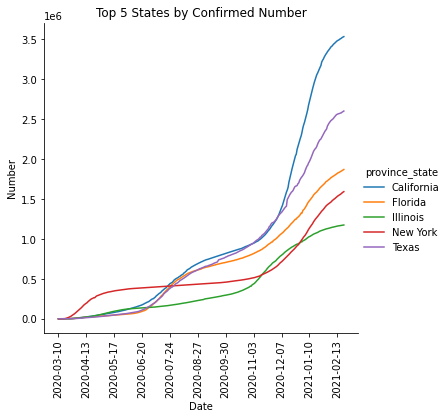

In [14]:
draw_top_n_hardest_hit_state(covid_by_state, var='confirmed_state', n=5)

From the graph, we can find that from March 2020 to July 2020, New York has been the state with most confirmed cases, however, the growth rate in New York become flat in May 2020, and California and Texas surpass New York become the top two states with most confirmed cases.

After December 2020, the growth rate of all 5 states began to increase again.

We can also look at the deaths numbersin these states.

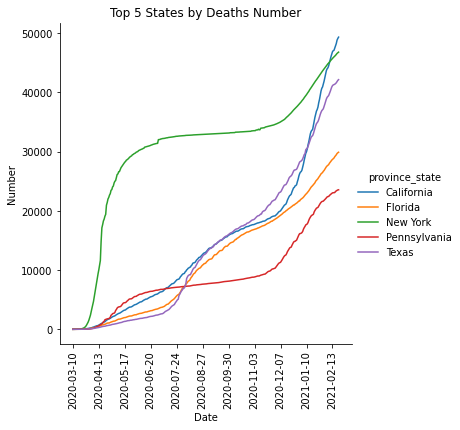

In [15]:
draw_top_n_hardest_hit_state(covid_by_state, var='deaths_state', n=5)

We can find that before 2021, New York has always been the state with most death number. It experiences an surge between 2020 April to 2020 June, then its growth rate flattern, while the deaths of other states still increase steadily. However, when the temperature decrease, in November, 2020, the growth rate in New York State increases again, as well as other states. Now California has become the first one with most deaths number.

What about top 10 states?

In [16]:
find_top_n_hardest_hit_state(covid_by_state, n=10)

province_state  confirmed_state  deaths_state
0      California          3531846       49345.0
1           Texas          2600660       42162.0
2         Florida          1868772       29906.0
3        New York          1591672       46812.0
4        Illinois          1174330       22466.0
5         Georgia           985505       16744.0
6            Ohio           953767       16816.0
7    Pennsylvania           915639       23565.0
8  North Carolina           842637       10926.0
9         Arizona           807967       15505.0

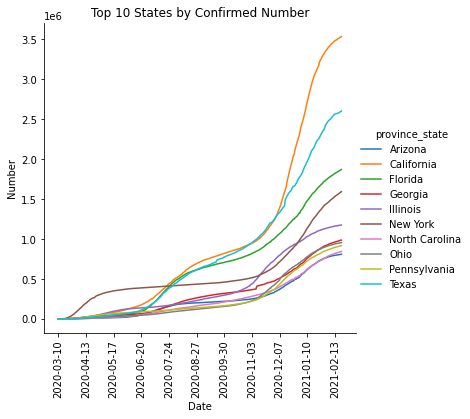

In [17]:
draw_top_n_hardest_hit_state(covid_by_state, var='confirmed_state', n=10)

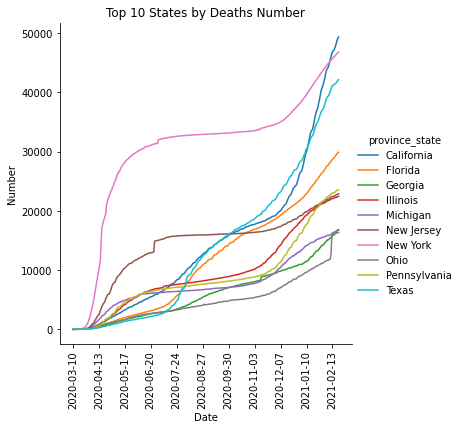

In [30]:
code.draw_top_n_hardest_hit_state(covid_by_state, var='deaths_state', n=10)

Now we have 'California',  'Texas', Florida',  'New York',  'Illinois',  'Georgia',  'Ohio',  'Pennsylvania',  'North Carolina',  and 'Arizona' as our top 10 states with most deaths numbers in the 2020-02-21. The results of top 10 states are similar to the results of top 5 states, the increasing rates are steep before July 2020, then become flatter among July to December, and then increase again since the winter. What's more, the shape of New York, New Jersy, Pennsylvania, Illinois, and Michigan are similar. I think this could be a result from geographical locations and most of them have some big cities such as NYC, Philidephia, and Chicago.

## Draw a Geographical Heatmap

In this part, we can draw a heatmap of the latest date confirmed and deaths number.

In [18]:
draw_state_heatmap(covid_by_state, var='confirmed_state')

In [19]:
draw_state_heatmap(covid_by_state, var='deaths_state')

From the graph, we can find that CA, TX, NY, FL and IL are the most seriously impacted states. East coast is generally more seriously impacted than west coast.

This plot is interactive. You can hover your mouse over certain state, and you can see the exact confirmed/deaths number of that state. You can also scroll down or up to zoom out or zoom in the map.